**PROJETO FINAL: OPERADORA DE COMUNICAÇÕES INTERCONNECT**

Neste projeto iremos desenvolver um modelo para a operadora de comunicações Interconnect. O foco principal deste projeto pode ser resumido como o problema de rotatividade de clientes. Churn, ou perda de clientes, é uma preocupação comum para empresas em muitos setores, incluindo telecomunicações. Refere-se à taxa na qual os clientes param de fazer negócios com uma empresa ou cancelam seus serviços ao longo do tempo.

Existem dois tipos principais de churn: churn voluntário e churn involuntário. O churn voluntário ocorre quando um cliente toma uma decisão consciente de encerrar seu relacionamento com uma empresa, seja por insatisfação com o produto ou serviço, problemas de atendimento ao cliente, mudança de emprego para um concorrente ou outros motivos pessoais. Este é o tipo de churn tratado no projeto.

Nesse contexto, utilizarei de técnicas de ciência de dados e machine learning para identificar padrões e prever o churn futuro.

Dentre essas técnicas, iniciarei  o processo de limpeza de dados removendo informações irrelevantes, manipulando possíveis valores ausentes, identificando outliers, verificando a consistência dos dados e realizando Feature engineering. Feature engineering é o processo de criar novas variáveis ou transformar as variáveis existentes em um conjunto de dados para melhorar o desempenho dos modelos de machine learning.

Explorarei uma variedade de modelos aprendidas durante o curso na busca dos melhores resultados. Posso citar as abordagens de Regressão Logística, Árvores de Decisão, Redes Neurais e Métodos Ensemble como técnicas de modelagem a serem usadas.Para avaliar a eficácia desses modelos utilizarei principalmente a métrica primária AUC-ROC e acurácia como métrica adicional. 

De posse dessas informações, quando a Interconnect descobre que um usuário está planejando mudar de operadora, ela pode tomar medidas preventivas, como oferecer códigos promocionais e opções de planos especiais, para manter os clientes satisfeitos e fiéis. Reduzir o churn é essencial, pois conquistar novos clientes normalmente é mais caro do que manter os clientes existentes. Além disso, a retenção de clientes promove a estabilidade financeira e o crescimento sustentável de uma empresa.


Meu primeiro passo foi importar todas as bibliotecas necessárias. 

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from IPython.display import display
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import seaborn as sns
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from scipy import stats
import sklearn.neighbors
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline, make_pipeline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from sklearn.ensemble import VotingClassifier
import warnings
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

Abri os 4 arquivos disponíveis.

In [3]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
# Função para apresentar as principais informações de um dataframe. 
def resumo(df):
    print('    ')
    print('Primeiras Linhas')
    display(df.head())
    print('    ')
    print('Informações')
    print('    ')
    df.info()
    print('    ')
    print('Distribuição dos Dados')
    display(df.describe())
    print('    ')
    print('Valores Ausentes')
    display(df.isna().sum())

Abaixo vemos as informações  das 4 tabelas:

In [5]:
print('Contract')
resumo(df_contract)

Contract
    
Primeiras Linhas


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


    
Informações
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
    
Distribuição dos Dados


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


    
Valores Ausentes


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [6]:
print('Internet')
resumo(df_internet)

Internet
    
Primeiras Linhas


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


    
Informações
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
    
Distribuição dos Dados


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,0696-UKTOX,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


    
Valores Ausentes


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [7]:
print('Personal')
resumo(df_personal)

Personal
    
Primeiras Linhas


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


    
Informações
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
    
Distribuição dos Dados


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


    
Valores Ausentes


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [8]:
print('Phone')
resumo(df_phone)

Phone
    
Primeiras Linhas


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


    
Informações
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
    
Distribuição dos Dados


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5356-KZCKT,No
freq,1,3390


    
Valores Ausentes


customerID       0
MultipleLines    0
dtype: int64

Usando Merge uni as 4 tabelas em uma só. 

In [9]:
df = df_contract.merge(df_internet, on='customerID', how='left')
df = df.merge(df_personal, on='customerID', how='left')
df = df.merge(df_phone, on='customerID', how='left')

Abaixo o dataframe que irei trabalhar ao longo do projeto:

In [10]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


In [11]:
resumo(df)

    
Primeiras Linhas


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


    
Informações
    
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     70

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


    
Valores Ausentes


customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

O df possui valores ausentes, já que nem todos os clientes possuem o serviço de Internet ou telefone.

Para substituir esses valores ausentes, escolhi algumas strings substitutas. Os ausentes na coluna MultipleLines são os clientes que não possuem telefone ('no_phone'). Mesma lógica para a coluna InternetService, alterei por 'no_internet’. Todas as outras colunas estavam relacionadas a tabela original ‘Internet’. Substitui todos esses valores ausentes por ‘no’, uma vez que, por não possuírem internet esses clientes, consequentemente, não possem esses serviços. 

In [12]:
df['MultipleLines'] = df['MultipleLines'].fillna('no_phone')
df['InternetService'] = df['InternetService'].fillna('no_internet')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('No')
df['OnlineBackup'] = df['OnlineBackup'].fillna('No')
df['DeviceProtection'] = df['DeviceProtection'].fillna('No')
df['StreamingTV'] = df['StreamingTV'].fillna('No')
df['StreamingMovies'] = df['StreamingMovies'].fillna('No')
df['TechSupport'] = df['TechSupport'].fillna('No')

In [13]:
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


Percebi que algumas colunas não estavam nos formatos corretos para serem trabalhadas. Por isso, nos próximos códigos as converti para o formato correto. Também, nessa etapa, realizei técnicas de Feature Engineering. 

Criei a coluna Churn que será essencial para a modelagem do problema e será nosso target. A coluna 'EndDate' mostra quando os serviços foram encerrados. Se está como 'No', significa que o cliente ainda está assinando os serviços da Interconnect. Na coluna Churn criada, 0 representa os clientes ativos e 1 os inativos. 

In [15]:
df['churn']=np.where(df['EndDate']=='No',0,1)

In [16]:
#Convertendo os dados da coluna TotalCharges:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

In [17]:
#Convertendo os dados da coluna BeginDate para o formato correto: 
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')

In [18]:
#Criando e convertendo os dados da coluna auxiliar 'data':
df['data']=np.where(df['EndDate']=='No','2020-02-01',df['EndDate'])
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d', errors='coerce')

Criei a coluna 'duration' para representar o número de meses em que o cliente se relaciona ou se relacionou com a empresa. 

In [19]:
df['duration'] = (df['data'] - df['BeginDate'])/np.timedelta64(1, 'M')

In [20]:
df['duration'] = round(df['duration'],0).astype('int')

Por fim, gerei a coluna TotalCharges_ratio_MonthlyCharges. É uma relação entre o valor total consumido e o produto da despesa mensal e os meses de assinatura do serviço. Se esse valor for maior que 1, então o cliente está pagando mais do que a média mensal acordada. Se for menor que 1, está pagando menos. Testarei mais a frente, se essa métrica impacta no churn. 

In [21]:
df.loc[df['duration']==0, 'TotalCharges_ratio_MonthlyCharges'] = 1
df.loc[df['duration']!=0, 'TotalCharges_ratio_MonthlyCharges'] =  df['TotalCharges']/ (df['duration'] * df['MonthlyCharges'])

Aqui vemos a participação de cliente ativos e inativos na base de dados. Aproximadamente 1/4 são de clientes inativos. Portanto, vemos um desbalanceamento de classes. 



In [22]:
print('Participação sem Churn:',  round((len(df[df['churn']==0]['churn']))/len(df['churn'])*100,2),'%'   )
print('Participação com Churn:',  round((len(df[df['churn']==1]['churn']))/len(df['churn']) *100,2),'%'   )

Participação sem Churn: 73.46 %
Participação com Churn: 26.54 %


Ao escolher uma métrica para avaliar um modelo de previsão de churn, é importante considerar a natureza do problema e as características dos dados. Como percebemos que há um desequilíbrio entre os clientes que permanecem ativos e os que abandonaram o serviço, métricas como a acurácia, podem ser enganosas.

Nesse caso, a métrica AUC-ROC (Área sob a curva ROC) é uma escolha apropriada. Ele mede a capacidade do modelo de distinguir entre clientes ativos e inativos, levando em consideração diferentes pontos de corte. Quanto maior a área sob a curva, melhor a capacidade de discriminação do modelo. 

A métrica AUC-ROC é útil porque permite avaliar a capacidade do modelo em classificar corretamente os clientes que abandonam o serviço, levando em consideração o desequilíbrio entre as classes. Como resultado, obtemos uma medida mais confiável da qualidade do modelo que não é afetada pelo desequilíbrio. 

Em um problema de churn, tanto os falsos positivos quanto os falsos negativos têm impactos negativos para a empresa, mas em diferentes aspectos.

Falsos positivos ocorrem quando o modelo prevê que um cliente abandonará o serviço, mas na realidade o cliente decide continuar. Isso pode levar a ações de retenção desnecessárias, resultando em custos adicionais e insatisfação do cliente.

Falsos negativos ocorrem quando o modelo não prevê que um cliente deixará um serviço, mas o cliente realmente decide fazê-lo.  Isso é prejudicial porque as empresas perdem a oportunidade de agir para reter clientes de alto risco.

Por isso, depende do contexto da empresa qual dos dois cenários é pior. Algumas empresas podem priorizar a minimização de falsos positivos para evitar gastos desnecessários. Outros podem se concentrar na redução de falsos positivos para reter clientes e maximizar o valor do cliente.

A seguir, gerei os gráficos de distribuições das variáveis categóricas, comparando os clientes ativos e inativos.

Distribuição: Type


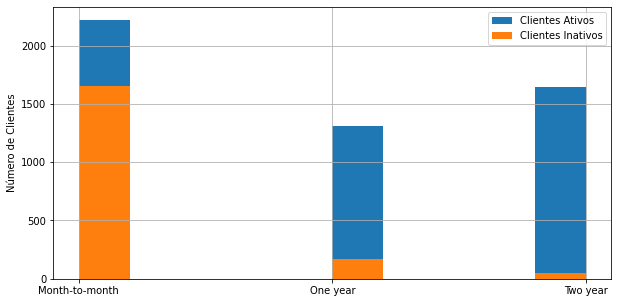

Distribuição Ativos: Type
Month-to-month    42.906842
Two year          31.832238
One year          25.260920
Name: Type, dtype: float64

Distribuição Inativos: Type
Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: Type, dtype: float64


Distribuição: PaperlessBilling


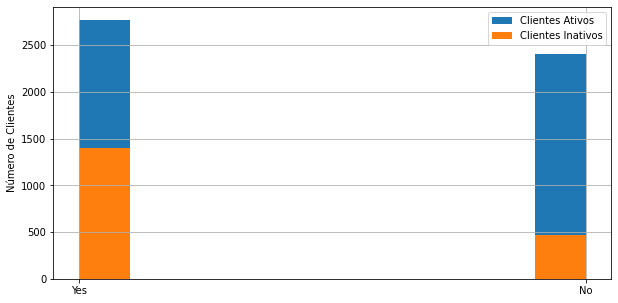

Distribuição Ativos: PaperlessBilling
Yes    53.556243
No     46.443757
Name: PaperlessBilling, dtype: float64

Distribuição Inativos: PaperlessBilling
Yes    74.906367
No     25.093633
Name: PaperlessBilling, dtype: float64


Distribuição: PaymentMethod


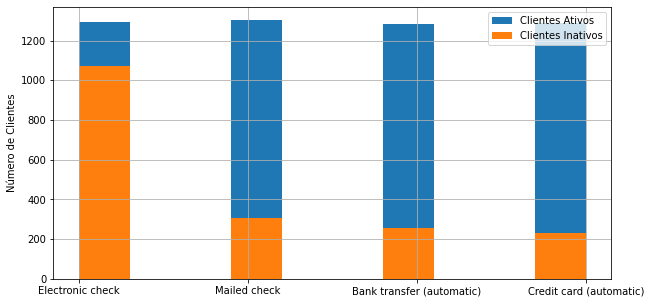

Distribuição Ativos: PaymentMethod
Mailed check                 25.202938
Electronic check             25.009664
Credit card (automatic)      24.932354
Bank transfer (automatic)    24.855044
Name: PaymentMethod, dtype: float64

Distribuição Inativos: PaymentMethod
Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: PaymentMethod, dtype: float64


Distribuição: InternetService


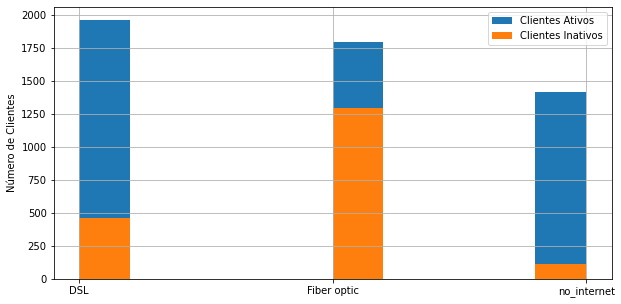

Distribuição Ativos: InternetService
DSL            37.920371
Fiber optic    34.770004
no_internet    27.309625
Name: InternetService, dtype: float64

Distribuição Inativos: InternetService
Fiber optic    69.395399
DSL            24.558587
no_internet     6.046014
Name: InternetService, dtype: float64


Distribuição: OnlineSecurity


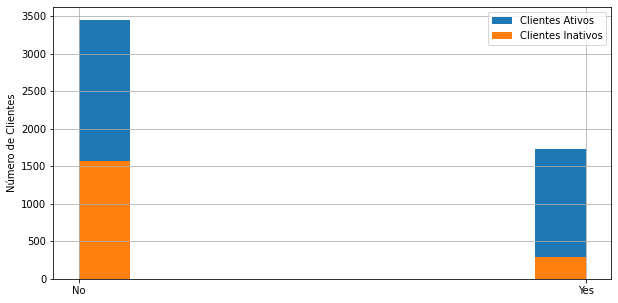

Distribuição Ativos: OnlineSecurity
No     66.679552
Yes    33.320448
Name: OnlineSecurity, dtype: float64

Distribuição Inativos: OnlineSecurity
No     84.216158
Yes    15.783842
Name: OnlineSecurity, dtype: float64


Distribuição: OnlineBackup


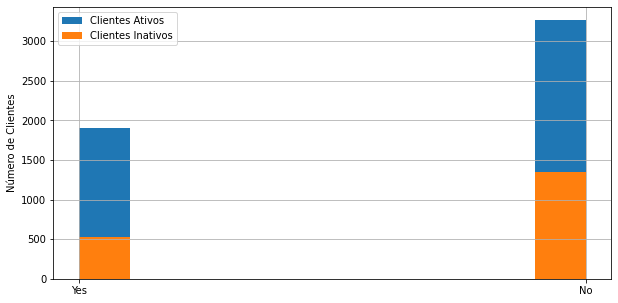

Distribuição Ativos: OnlineBackup
No     63.161964
Yes    36.838036
Name: OnlineBackup, dtype: float64

Distribuição Inativos: OnlineBackup
No     72.017121
Yes    27.982879
Name: OnlineBackup, dtype: float64


Distribuição: DeviceProtection


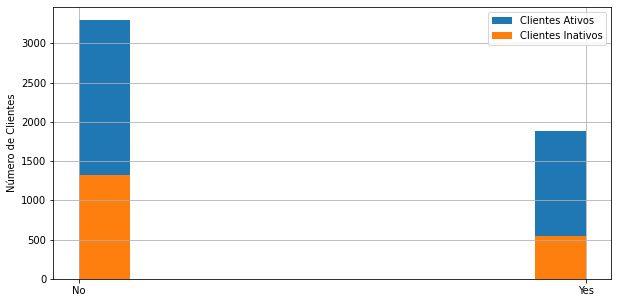

Distribuição Ativos: DeviceProtection
No     63.722458
Yes    36.277542
Name: DeviceProtection, dtype: float64

Distribuição Inativos: DeviceProtection
No     70.840021
Yes    29.159979
Name: DeviceProtection, dtype: float64


Distribuição: TechSupport


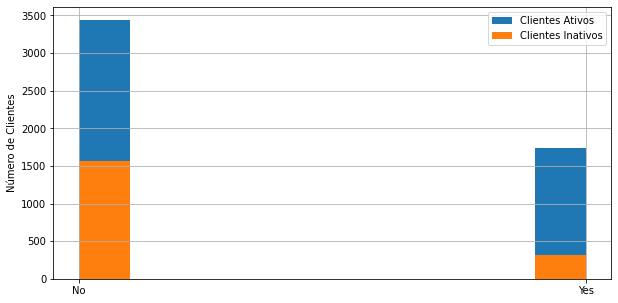

Distribuição Ativos: TechSupport
No     66.486278
Yes    33.513722
Name: TechSupport, dtype: float64

Distribuição Inativos: TechSupport
No     83.41359
Yes    16.58641
Name: TechSupport, dtype: float64


Distribuição: StreamingTV


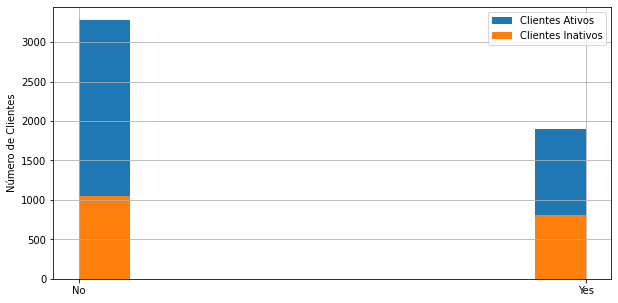

Distribuição Ativos: StreamingTV
No     63.41322
Yes    36.58678
Name: StreamingTV, dtype: float64

Distribuição Inativos: StreamingTV
No     56.447298
Yes    43.552702
Name: StreamingTV, dtype: float64


Distribuição: StreamingMovies


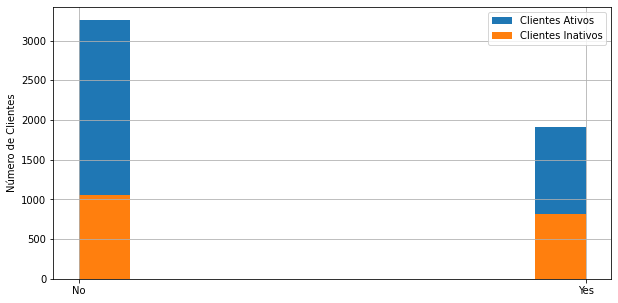

Distribuição Ativos: StreamingMovies
No     63.007344
Yes    36.992656
Name: StreamingMovies, dtype: float64

Distribuição Inativos: StreamingMovies
No     56.23328
Yes    43.76672
Name: StreamingMovies, dtype: float64


Distribuição: gender


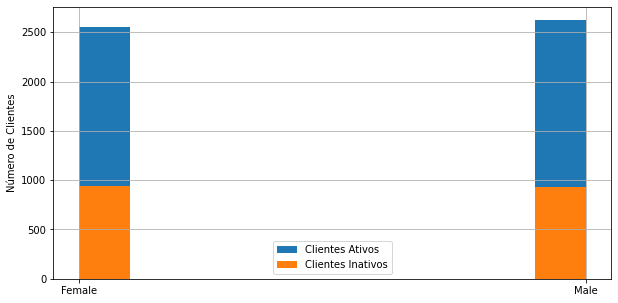

Distribuição Ativos: gender
Male      50.734441
Female    49.265559
Name: gender, dtype: float64

Distribuição Inativos: gender
Female    50.24077
Male      49.75923
Name: gender, dtype: float64


Distribuição: SeniorCitizen


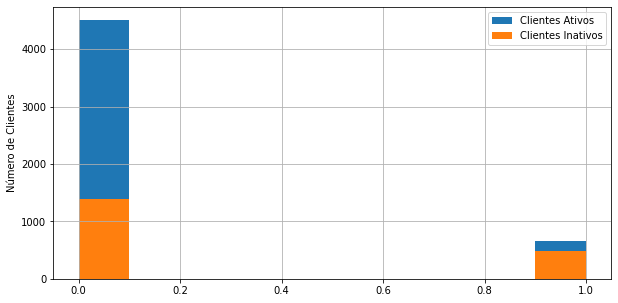

Distribuição Ativos: SeniorCitizen
0    87.127947
1    12.872053
Name: SeniorCitizen, dtype: float64

Distribuição Inativos: SeniorCitizen
0    74.531835
1    25.468165
Name: SeniorCitizen, dtype: float64


Distribuição: Partner


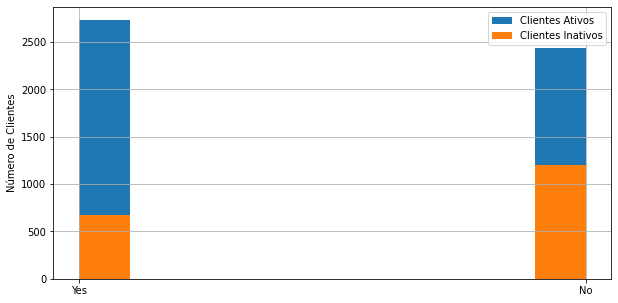

Distribuição Ativos: Partner
Yes    52.821801
No     47.178199
Name: Partner, dtype: float64

Distribuição Inativos: Partner
No     64.205457
Yes    35.794543
Name: Partner, dtype: float64


Distribuição: Dependents


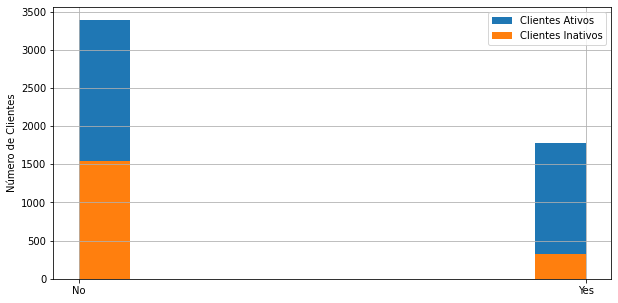

Distribuição Ativos: Dependents
No     65.519907
Yes    34.480093
Name: Dependents, dtype: float64

Distribuição Inativos: Dependents
No     82.557517
Yes    17.442483
Name: Dependents, dtype: float64


Distribuição: MultipleLines


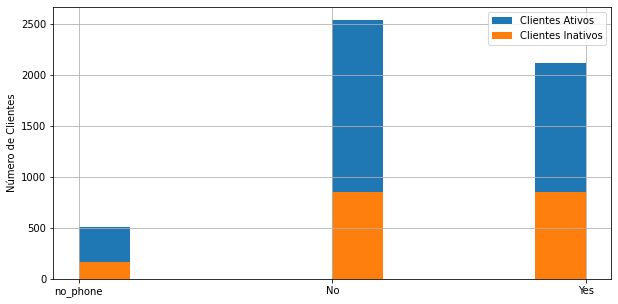

Distribuição Ativos: MultipleLines
No          49.110939
Yes         40.993429
no_phone     9.895632
Name: MultipleLines, dtype: float64

Distribuição Inativos: MultipleLines
Yes         45.478866
No          45.425361
no_phone     9.095773
Name: MultipleLines, dtype: float64




In [23]:
col =['Type','PaperlessBilling','PaymentMethod','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','gender','SeniorCitizen','Partner','Dependents','MultipleLines']
for i in col:
    print('Distribuição:',i)
    df[df['churn']==0][i].hist(figsize = (10, 5),label="Clientes Ativos")
    df[df['churn']==1][i].hist(figsize = (10, 5),label="Clientes Inativos")
    plt.legend()
    plt.ylabel('Número de Clientes')
    plt.show()
    print('Distribuição Ativos:',i)
    print((df[df['churn']==0][i].value_counts() /len(df[df['churn']==0][i]))*100)
    print('')
    print('Distribuição Inativos:',i)
    print((df[df['churn']==1][i].value_counts() /len(df[df['churn']==1][i]))*100)
    print('')
    print('')

A seguir, gerei os gráficos de distribuições das variáveis categóricas, comparando os clientes ativos e inativos.
Algumas observações podem ser feitas analisando esses gráficos:

1)	Os clientes que escolhem fazer um pagamento mensal têm uma chance maior de deixarem a empresa, pois a proporção relativa é muito maior dos clientes Inativos em relação aos ativos.  

2)	A proporção dos clientes que não recebem a cobrança em papel é maior nos inativos.

3)	O método de pagamento Eletronic Check é mais representativo nos clientes inativos do que nos ativos.

4)	Os clientes que escolhem o serviço de internet de Fibra Ótica tendem a cancelar mais o serviço que os outros.

5)	As variáveis MultipleLines, Dependents, Partner, SeniorCitizen, gender e as ligadas aos serviços de Internet não mostraram tanta diferença entre os clientes ativos e os inativos.


Gráficos: Comportamento ao longo do tempo

O Gráfico da duração dos contratos sinaliza que o churn ocorreu em uma frequência muito maior nos contratos de pouca duração.  

Análise do número de clientes por duração dos contratos em meses:


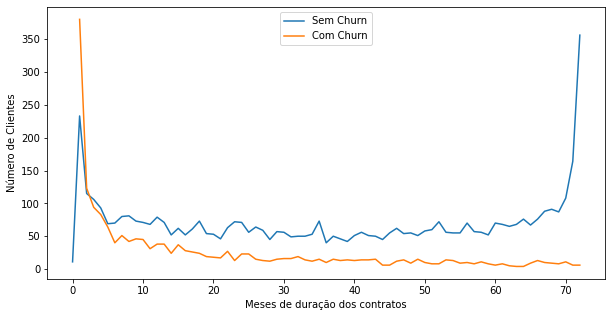

In [24]:
print('Análise do número de clientes por duração dos contratos em meses:')
df[df['churn']==0]['duration'].value_counts().sort_index().plot(figsize = (10, 5),label="Sem Churn")
df[df['churn']==1]['duration'].value_counts().sort_index().plot(figsize = (10, 5),label="Com Churn")
plt.legend()
plt.xlabel('Meses de duração dos contratos')
plt.ylabel('Número de Clientes')
plt.show()    

Percebemos pelo gráfico abaixo um aumento do número de contratos com início nos últimos meses. 

Evolução dos Inícios dos Contratos:


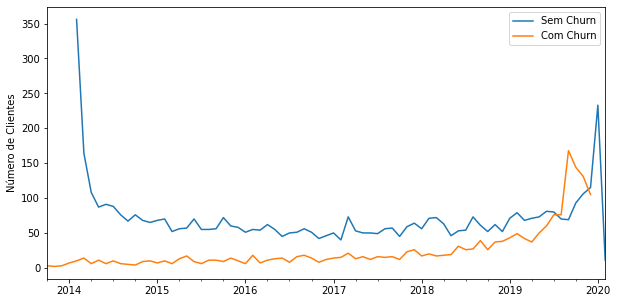

In [25]:
print('Evolução dos Inícios dos Contratos:')
df[df['churn']==0]['BeginDate'].value_counts().sort_index().plot(figsize = (10, 5),label="Sem Churn")
df[df['churn']==1]['BeginDate'].value_counts().sort_index().plot(figsize = (10, 5),label="Com Churn")
plt.legend()
plt.ylabel('Número de Clientes')
plt.show()    

Aqui fica claro que os clientes deixaram a empresa somente nos últimos 4 meses.

Histórico do número de clientes que encerraram o contrato:


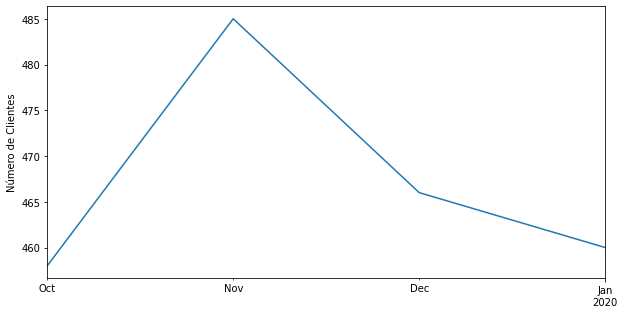

In [26]:
print("Histórico do número de clientes que encerraram o contrato:")

(df[df['churn']==1]['data'].value_counts().sort_index()).plot(figsize = (10, 5))
plt.ylabel('Número de Clientes')
plt.show()

In [27]:
df[df['churn']==1]['data'].value_counts().sort_index()

2019-10-01    458
2019-11-01    485
2019-12-01    466
2020-01-01    460
Name: data, dtype: int64

In [28]:
df[df['churn']==1]['BeginDate'].value_counts().sort_values().tail(10)

2019-01-01     43
2019-02-01     49
2019-05-01     50
2019-06-01     60
2019-08-01     76
2019-07-01     76
2019-12-01    105
2019-11-01    131
2019-10-01    144
2019-09-01    168
Name: BeginDate, dtype: int64

In [29]:
df[df['churn']==1]['BeginDate'].value_counts().sort_values().tail(10).sum()

902

In [30]:
a =df[df['churn']==1]['BeginDate'].value_counts().sort_values().tail(10).sum() / df[df['churn']==1]['BeginDate'].value_counts().sort_values().sum()
print(round(a,4)*100,'%')

48.26 %


Quase a metade dos clientes que deixaram Interconnect, começaram o relacionamento com a empresa em menos de 1 ano. 

Para explorar melhor a relação de churn com as durações dos contratos, criei faixas de 'duration' para agrupar os clientes. Assim, pude calcular a taxa de churn de cada bucket.  

In [31]:
#Criando uma coluna com as faixas de duração dos contratos:
df['faixa_duration'] = pd.cut(df['duration'],bins=12)

In [32]:
print('Percentual de cada Faixa na amostra:')
df['faixa_duration'].value_counts().sort_index() / len(df['faixa_duration']) *100

Percentual de cada Faixa na amostra:


(-0.072, 6.0]    21.027971
(6.0, 12.0]      10.009939
(12.0, 18.0]      7.780775
(18.0, 24.0]      6.758484
(24.0, 30.0]      6.119551
(30.0, 36.0]      5.693596
(36.0, 42.0]      5.381230
(42.0, 48.0]      5.438024
(48.0, 54.0]      5.963368
(54.0, 60.0]      5.849780
(60.0, 66.0]      6.573903
(66.0, 72.0]     13.403379
Name: faixa_duration, dtype: float64

Escolhi 12 faixas, pois assim todas possuem tamanho significativo na amostra e os limites dos de cada faixa são número inteiros. 

In [33]:
print('Taxa de Churn em cada Faixa:')
(df[df['churn']==1]['faixa_duration'].value_counts().sort_index()/ df['faixa_duration'].value_counts().sort_index())*100 

Taxa de Churn em cada Faixa:


(-0.072, 6.0]    52.937205
(6.0, 12.0]      35.886525
(12.0, 18.0]     32.299270
(18.0, 24.0]     24.579832
(24.0, 30.0]     21.809745
(30.0, 36.0]     21.446384
(36.0, 42.0]     21.899736
(42.0, 48.0]     16.187990
(48.0, 54.0]     16.190476
(54.0, 60.0]     12.621359
(60.0, 66.0]      9.287257
(66.0, 72.0]      5.296610
Name: faixa_duration, dtype: float64

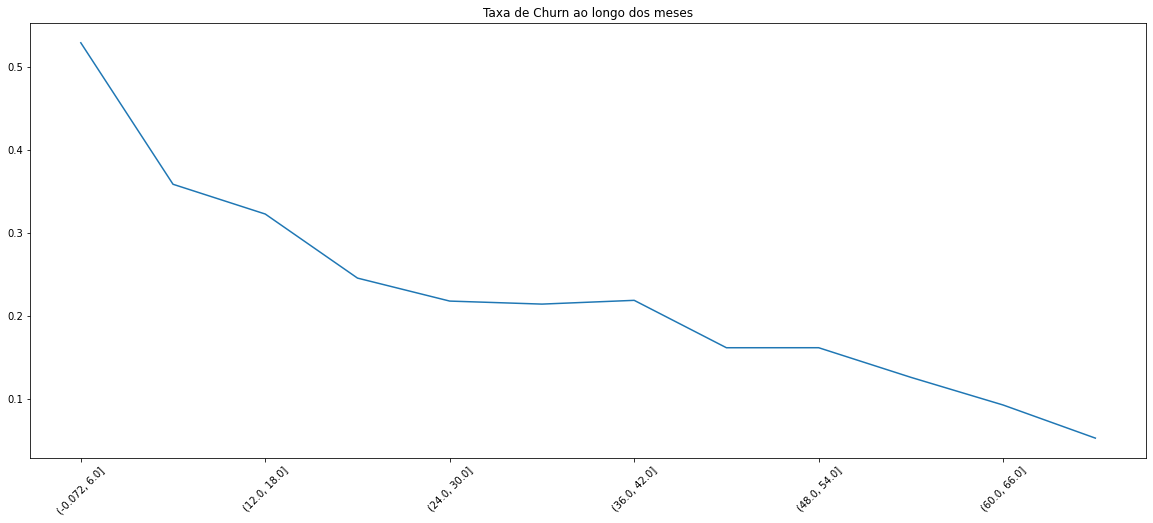

In [34]:
(df[df['churn']==1]['faixa_duration'].value_counts().sort_index()/ df['faixa_duration'].value_counts().sort_index()).plot(figsize=(20,8))
plt.xticks(rotation=45)
plt.title("Taxa de Churn ao longo dos meses")
plt.show()

Aqui fica claro que a taxa de churn aumenta na medida em que a duração dos contrato diminui.

Para averiguar se há diferença estatística na duração dos contratos e churn, realizei abaixo o teste t. 

In [35]:
churn_group = df[df['churn'] == 1]['duration']
no_churn_group = df[df['churn'] == 0]['duration']

t_statistic, p_value = stats.ttest_ind(churn_group, no_churn_group, equal_var=False, alternative='less')

alpha = 0.05  # nível de significância

if p_value < alpha:
    print("A coluna 'duration' é estatisticamente menor para os clientes que sofrem churn.")
else:
    print("A coluna 'duration' não é estatisticamente menor para os clientes que sofrem churn.")

A coluna 'duration' é estatisticamente menor para os clientes que sofrem churn.


Rejeitamos a hipótese nula, com alpha 0.05, de que a duração média dos usuários ativos e inativos são as mesmas. Chegamos a essa conclusão, pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade de a hipótese nula ser verdadeira é muito baixa. 

Também explorarei, se o mês que o cliente começou na empresa impacta no churn. 

In [36]:
# Criando a coluna com mês inicial
df['mes'] = df['BeginDate'].dt.month

In [37]:
# Tamanho da amostra por mês
df['mes'].value_counts().sort_index() 

1     623
2     804
3     590
4     511
5     494
6     522
7     518
8     532
9     623
10    601
11    621
12    604
Name: mes, dtype: int64

In [38]:
print('Taxa de Churn em cada mês:')
df[df['churn']==1]['mes'].value_counts().sort_index()/df['mes'].value_counts().sort_index()*100

Taxa de Churn em cada mês:


1     15.088283
2     15.174129
3     18.135593
4     19.178082
5     25.506073
6     25.287356
7     27.413127
8     28.383459
9     41.252006
10    35.274542
11    36.070853
12    33.774834
Name: mes, dtype: float64

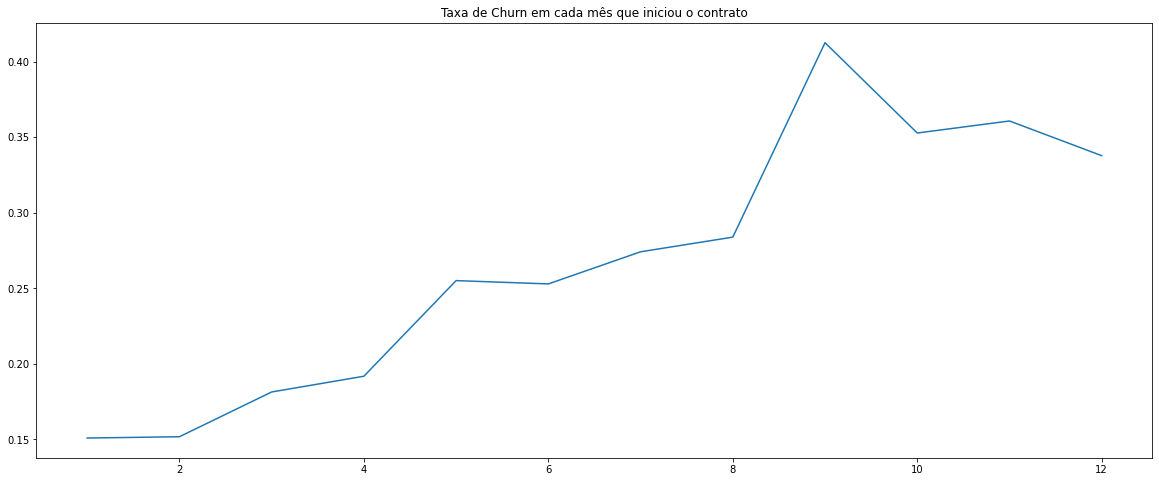

In [39]:
(df[df['churn']==1]['mes'].value_counts().sort_index()/df['mes'].value_counts().sort_index()).plot(figsize=(20,8))
plt.xticks(rotation=0)
plt.title("Taxa de Churn em cada mês que iniciou o contrato")
plt.show()

Vemos claramente que a taxa de churn é maior para os clientes que começaram na empresa nos últimos meses do ano. 

Explorarei nos próximos gráficos as variáveis relacionadas aos pagamentos dos clientes: 

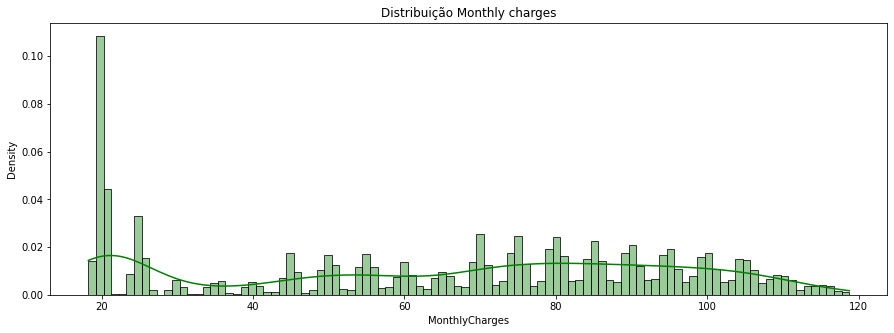

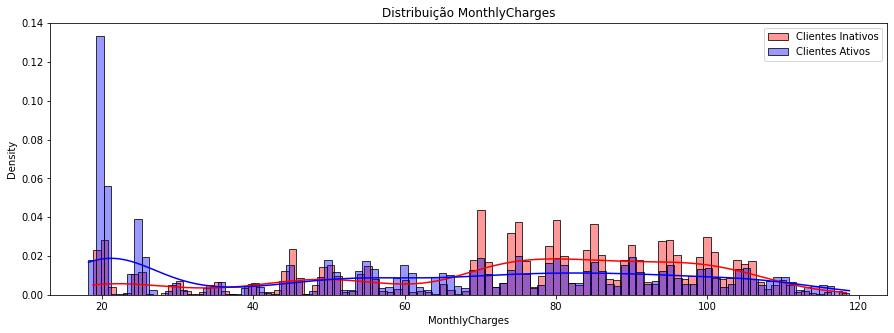

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(df['MonthlyCharges'], kde=True, alpha = 0.4, color = 'green', stat= 'density', bins=100)
plt.title('Distribuição Monthly charges')
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(df[df['churn']==1]['MonthlyCharges'], kde=True, alpha=0.4, color='red', stat='density', bins=100, label='Clientes Inativos')
sns.histplot(df[df['churn']==0]['MonthlyCharges'], kde=True, alpha=0.4, color='blue', stat='density', bins=100, label='Clientes Ativos')
plt.title('Distribuição MonthlyCharges')
plt.legend()
plt.show()

Os clientes que cancelaram o serviço tinham uma cobrança mensal mais alta em comparação aos que não cancelaram.

Para averiguar se há diferença estatística nas cobranças mensais e churn, realizei abaixo o teste t. 

In [41]:
churn_group = df[df['churn'] == 1]['MonthlyCharges']
no_churn_group = df[df['churn'] == 0]['MonthlyCharges']

t_statistic, p_value = stats.ttest_ind(churn_group, no_churn_group, equal_var=False, alternative='greater')

alpha = 0.05  # nível de significância

if p_value < alpha:
    print("A coluna 'monthly charges' é estatisticamente maior para os clientes que sofrem churn.")
else:
    print("A coluna 'monthly charges' não é estatisticamente maior para os clientes que sofrem churn.")

A coluna 'monthly charges' é estatisticamente maior para os clientes que sofrem churn.


Rejeitamos a hipótese nula, com alpha 0.05, de que a cobrança mensal média dos usuários ativos e inativos são as mesmas. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade de a hipótese nula ser verdadeira é muito baixa. 

Distribuição das Cobranças Totais:


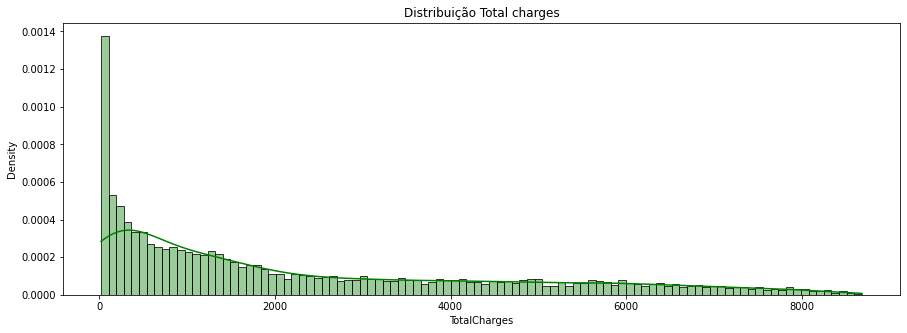

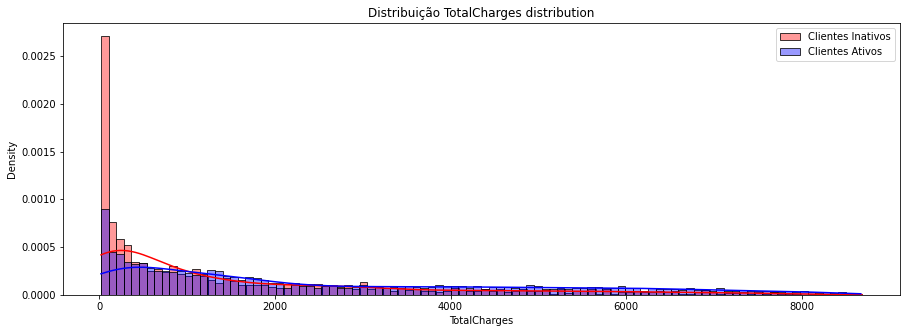

In [42]:
plt.figure(figsize=(15,5))
sns.histplot(df.TotalCharges, kde=True, alpha = 0.4, color = 'green', stat= 'density', bins=100)
plt.title('Distribuição Total charges')
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(df[df['churn']==1]['TotalCharges'], kde=True, alpha=0.4, color='red', stat='density', bins=100, label='Clientes Inativos')
sns.histplot(df[df['churn']==0]['TotalCharges'], kde=True, alpha=0.4, color='blue', stat='density', bins=100, label='Clientes Ativos')
plt.title('Distribuição TotalCharges distribution')
plt.legend()
plt.show()

A distribuição de cobrança total é similar para os clientes ativos e inativos. Há uma concentração maior em valores mais baixos. isso faz sentido, já que boa parte dos clientes começou na empresa a poucos meses.   


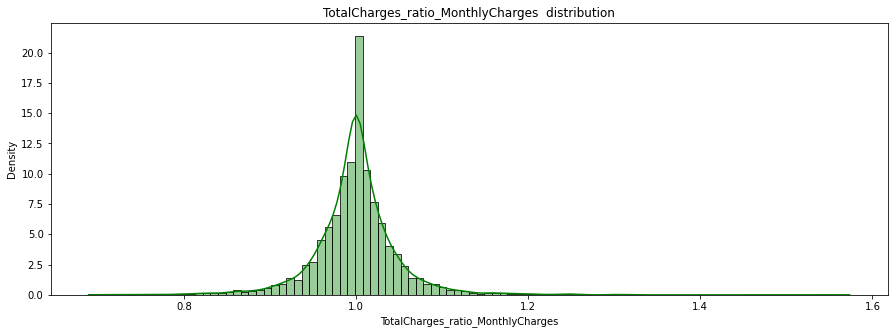

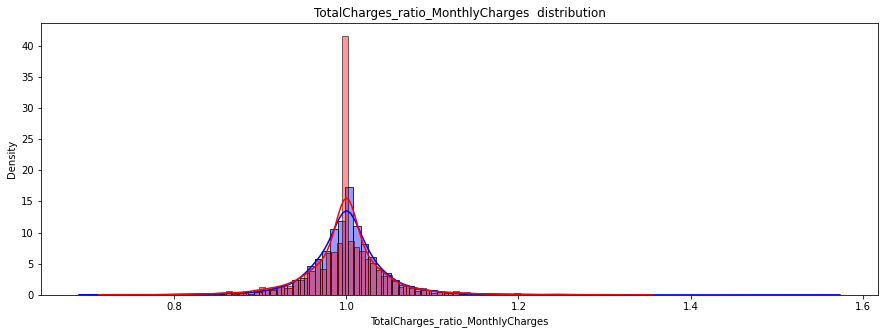

In [43]:
plt.figure(figsize=(15,5))
sns.histplot(df.TotalCharges_ratio_MonthlyCharges, kde=True, alpha = 0.4, color = 'green', stat= 'density', bins=100)
plt.title('TotalCharges_ratio_MonthlyCharges  distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(df[df['churn']==0]['TotalCharges_ratio_MonthlyCharges'], kde=True, alpha = 0.4, color = 'blue', stat= 'density', bins=100, label='Clientes Ativos')
sns.histplot(df[df['churn']==1]['TotalCharges_ratio_MonthlyCharges'], kde=True, alpha = 0.4, color = 'red', stat= 'density', bins=100, label='Clientes Inativos')
plt.title('TotalCharges_ratio_MonthlyCharges  distribution')
plt.show()

A variável TotalCharges_ratio_MonthlyCharges que criei possui distribuição parecida com a normal. 

Os gráficos boxplot da cobrança mensal e total nos mostram algumas medidas estatísticas dessas variáveis. 

No gráfico da cobrança mensal não vemos a presença de outliers. Também, percebemos que a mediana, o terceiro quartil e o primeiro quartil, para quem sofra churn, é maior do que para quem não sofre.  


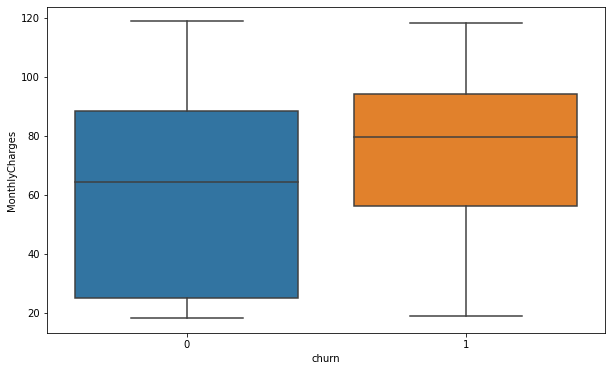

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='churn', y='MonthlyCharges', data=df, ax = ax)
plt.ylabel('MonthlyCharges')
plt.show()

Já o boxplot de ‘TotalCharges’ sinaliza alguns outliers no limite superior para quem sofre churn. Fora esses outlers, vemos que um comportamento oposto da cobrança total em relação a mensal, já que, nesse caso, a mediana, o terceiro quartil e o primeiro quartil são menores para quem sofre churn. Creio que isso é explicado pela maior correlação da variável ‘TotalCharges’’ com a duração do contrato. Como mostrei anteriormente, quanto menor a duração do contrato, maior a chance de o cliente deixar a empresa. 

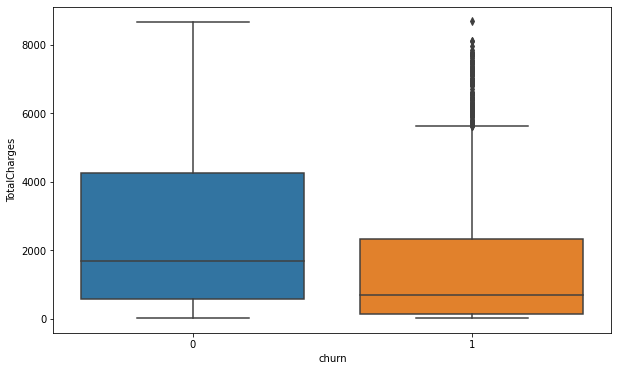

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='churn', y='TotalCharges', data=df, ax = ax)
plt.ylabel('TotalCharges')
plt.show()

Na busca de entender melhor e relação de ‘MonthlyCharges’ com churn, plotei gráficos boxplot segregados por serviço. Pude perceber que nem sempre o cliente que tem uma mensalidade mais cara tende a sofrer mais churn. Por exemplo, a mediana da cobrança mensal de quem tem serviço de internet DSL e Fibra ótica é menor. Esse comportamento também é visto nos clientes que não possuem nenhuma linha telefônica.

MonthlyCharges X Type


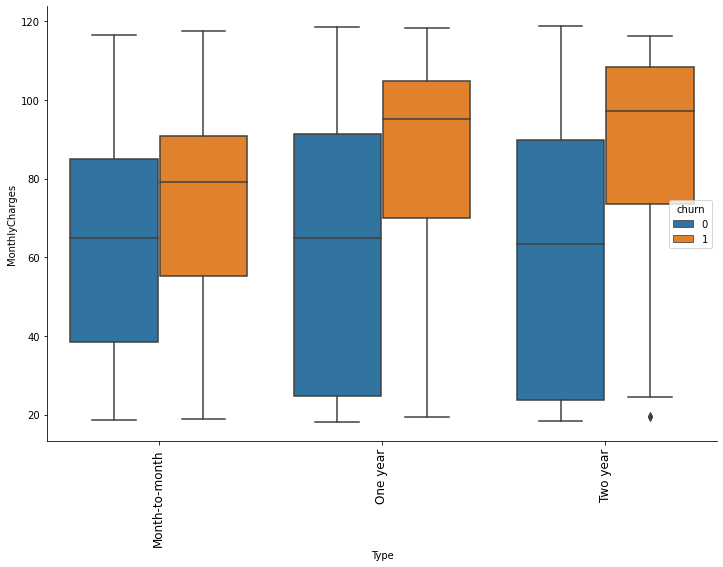

MonthlyCharges X PaperlessBilling


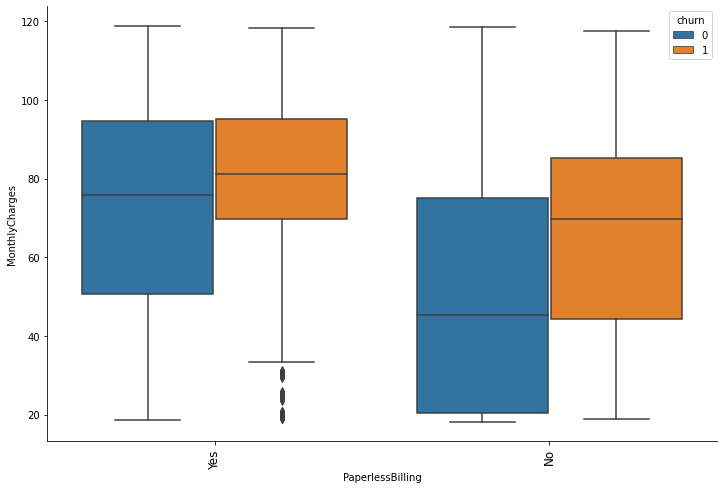

MonthlyCharges X PaymentMethod


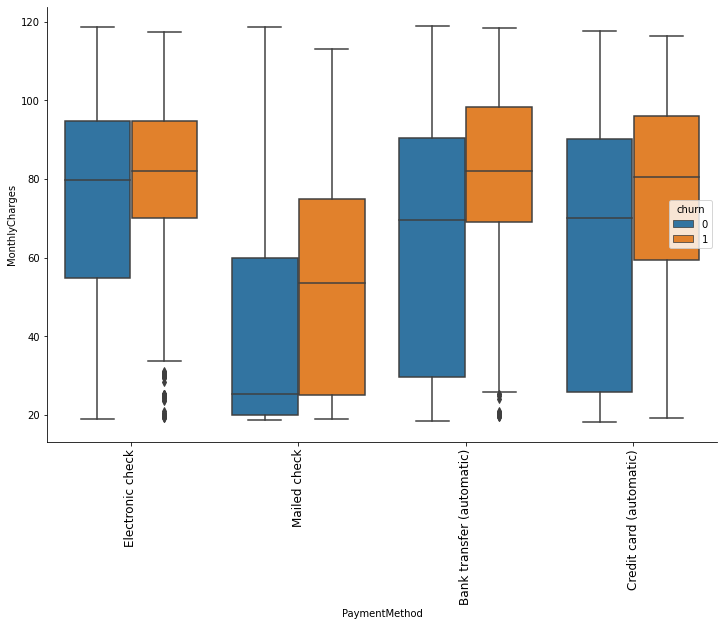

MonthlyCharges X InternetService


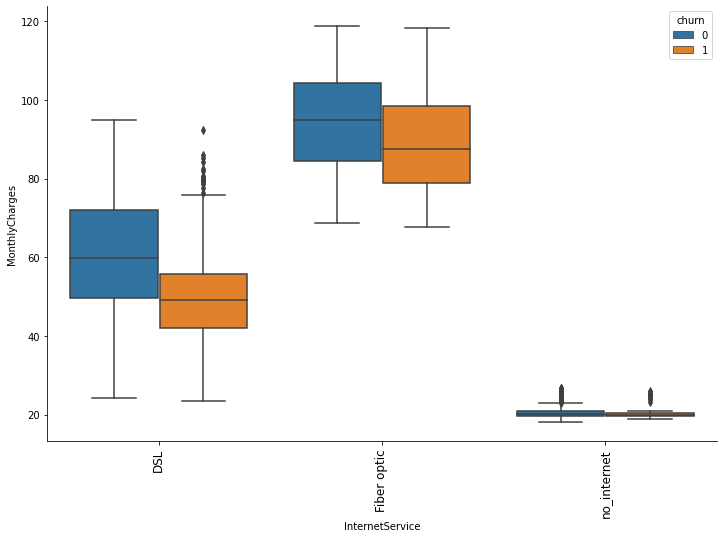

MonthlyCharges X OnlineSecurity


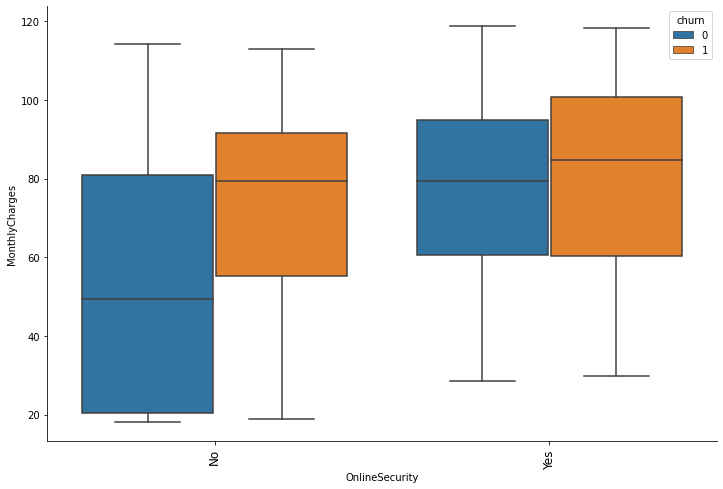

MonthlyCharges X OnlineBackup


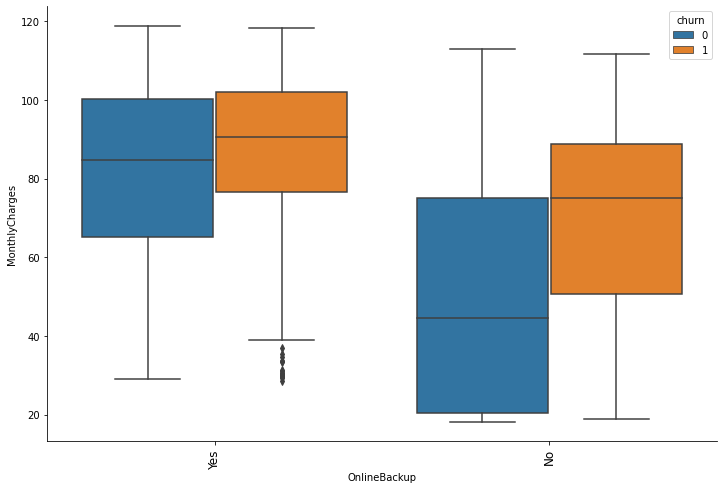

MonthlyCharges X DeviceProtection


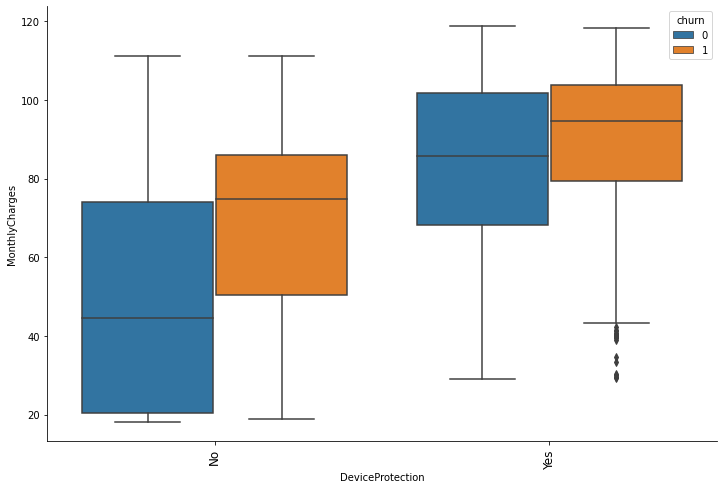

MonthlyCharges X TechSupport


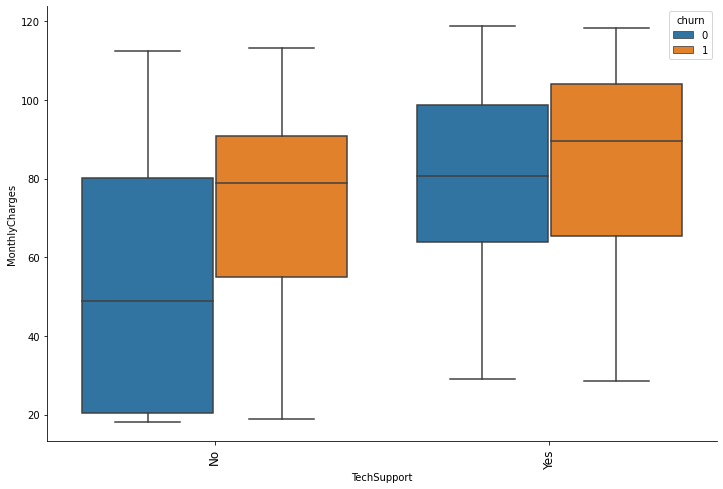

MonthlyCharges X StreamingTV


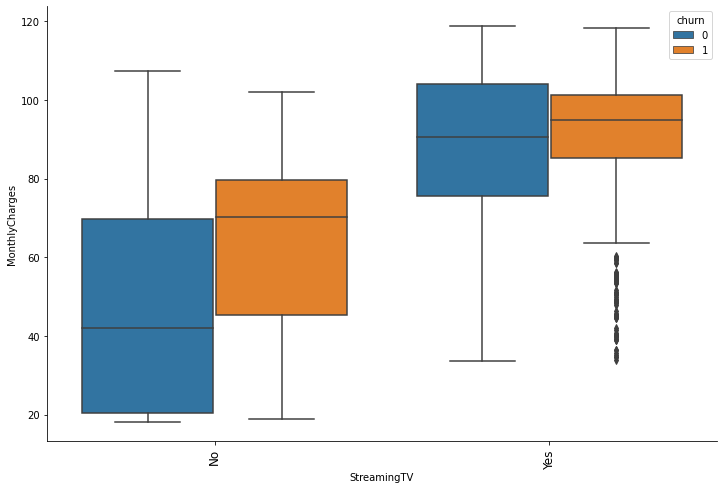

MonthlyCharges X StreamingMovies


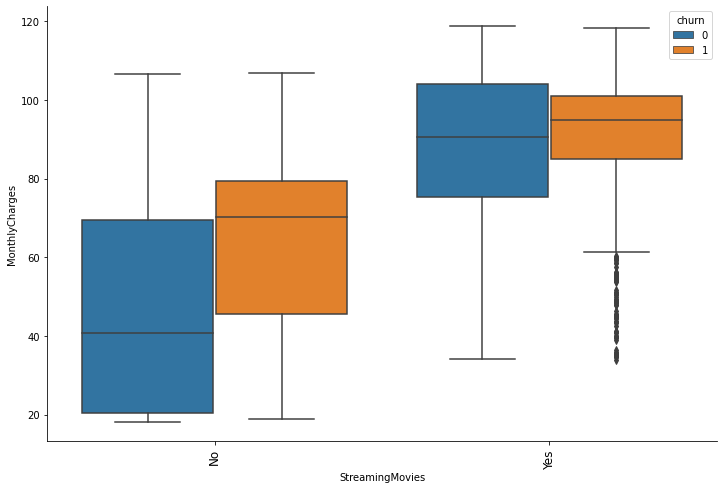

MonthlyCharges X gender


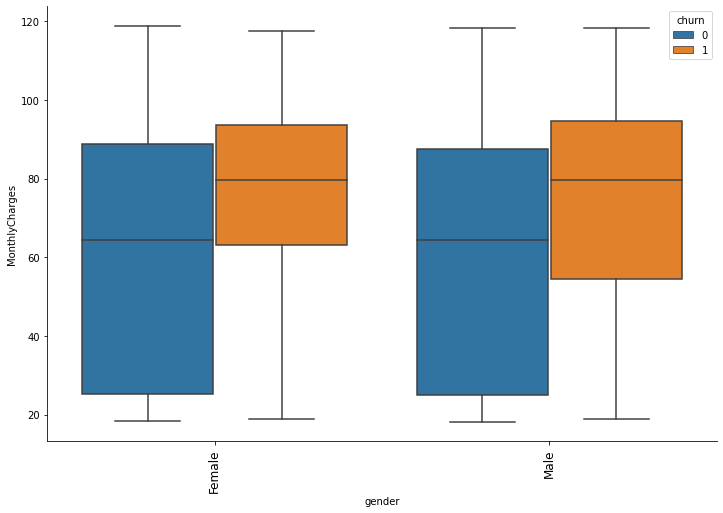

MonthlyCharges X SeniorCitizen


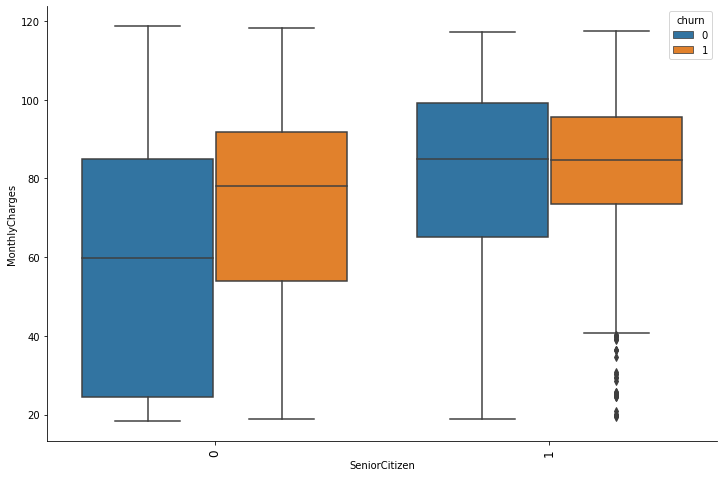

MonthlyCharges X Partner


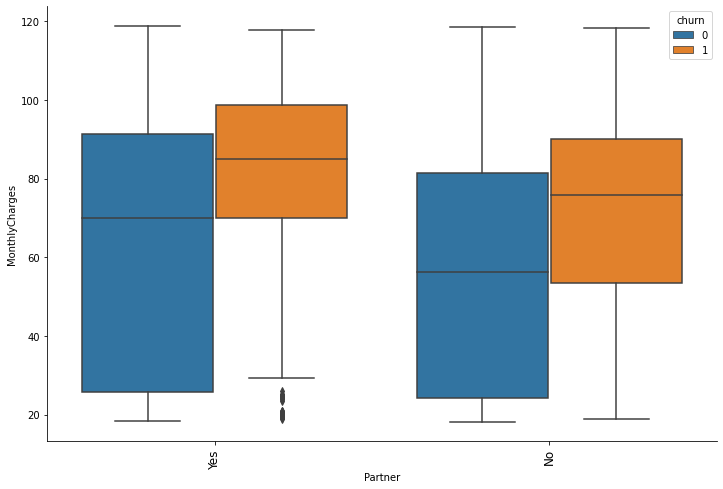

MonthlyCharges X Dependents


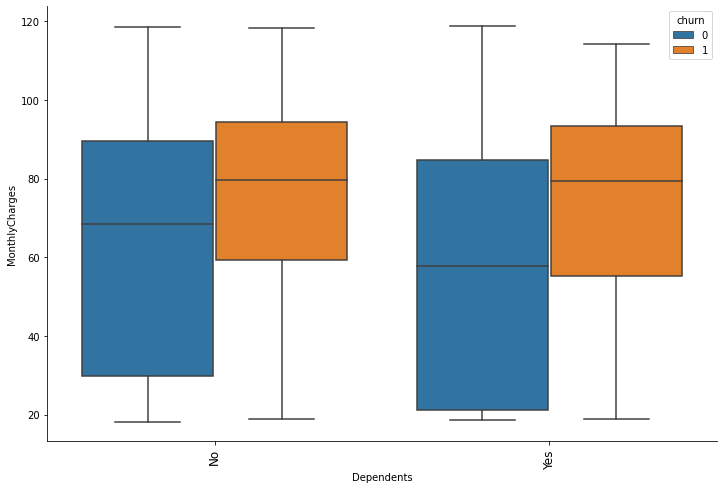

MonthlyCharges X MultipleLines


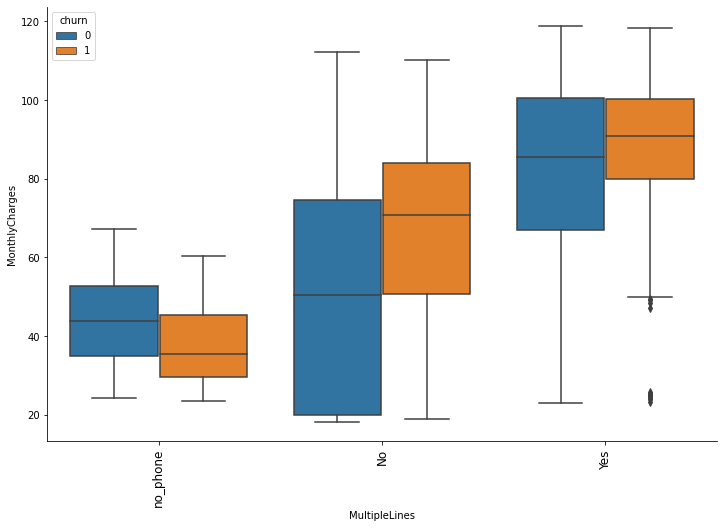

In [46]:
for c in col:
    print('MonthlyCharges X',c)
    fig, ax = plt.subplots(figsize = (12,8))
    sns.boxplot(c, 'MonthlyCharges', hue = 'churn', data = df, ax = ax)
    plt.xticks(rotation = 90, fontsize = 12)
    sns.despine()
    plt.show()

Para explorar melhor a relação de churn com as mensalidades, criei faixas de mensalidades para agrupar os clientes. Assim, pude calcular a taxa de churn de cada bucket. 

In [47]:
#Criando uma coluna com as faixas de Gasto Mensal:
df['faixa_gasto_mensal'] = pd.cut(df['MonthlyCharges'],bins=5)

In [48]:
print('Percentual de cada Faixa na amostra:')
df['faixa_gasto_mensal'].value_counts().sort_index() / len(df['faixa_gasto_mensal']) *100

Percentual de cada Faixa na amostra:


(18.15, 38.35]     25.514695
(38.35, 58.45]     14.269487
(58.45, 78.55]     19.409343
(78.55, 98.65]     25.926452
(98.65, 118.75]    14.880023
Name: faixa_gasto_mensal, dtype: float64

Escolhi 5 faixas, pois assim todas possuem tamanho significativo na amostra.

In [49]:
print('Taxa de Churn em cada Faixa:')
(df[df['churn']==1]['faixa_gasto_mensal'].value_counts().sort_index()/ df['faixa_gasto_mensal'].value_counts().sort_index())*100 

Taxa de Churn em cada Faixa:


(18.15, 38.35]     11.407902
(38.35, 58.45]     26.965174
(58.45, 78.55]     29.480614
(78.55, 98.65]     36.966046
(98.65, 118.75]    30.057252
Name: faixa_gasto_mensal, dtype: float64

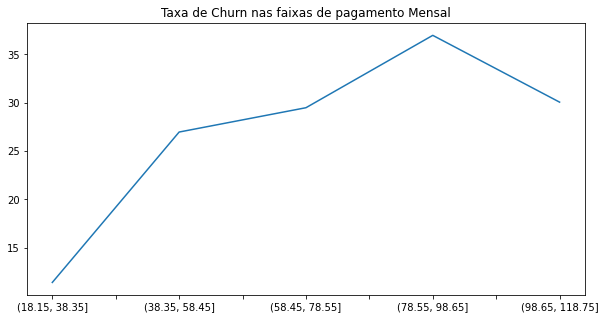

In [50]:
(df[df['churn']==1]['faixa_gasto_mensal'].value_counts().sort_index()/ df['faixa_gasto_mensal'].value_counts().sort_index()*100).plot(figsize=(10,5))
plt.title("Taxa de Churn nas faixas de pagamento Mensal")
plt.show()

Aqui fica claro que a taxa de churn cresce na medida em que a mensalidade aumenta, tendo um declínio na faixa mais cara.  

Transformando as variáveis categóricas em numéricas para uso futuro nos modelos de machine learning. 

In [51]:
# Aqui usei a técnica de Codificação One-Hot (OHE) para transformar características categóricas em características numéricas. 
col_encoder =['Type','PaperlessBilling','PaymentMethod','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','gender','Partner','Dependents','MultipleLines']
df_corr = pd.get_dummies(df, columns = col_encoder, drop_first=True)

In [52]:
# Transformar características categóricas ordinais em características numéricas. 
encoder= OrdinalEncoder()
col_ordinal = ['faixa_duration','faixa_gasto_mensal']
df_corr[col_ordinal] = encoder.fit_transform(df[col_ordinal])

In [53]:
df_corr

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,SeniorCitizen,churn,data,duration,TotalCharges_ratio_MonthlyCharges,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,MultipleLines_no_phone
0,7590-VHVEG,2020-01-01,No,29.85,29.85,0,0,2020-02-01,1,1.000000,...,1,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,2017-04-01,No,56.95,1889.50,0,0,2020-02-01,34,0.975830,...,0,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,53.85,108.15,0,1,2019-12-01,2,1.004178,...,1,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,2016-05-01,No,42.30,1840.75,0,0,2020-02-01,45,0.967034,...,0,1,1,0,0,1,0,0,0,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,70.70,151.65,0,1,2019-11-01,2,1.072489,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,84.80,1990.50,0,0,2020-02-01,24,0.978037,...,0,1,1,1,1,1,1,1,1,0
7039,2234-XADUH,2014-02-01,No,103.20,7362.90,0,0,2020-02-01,72,0.990916,...,1,1,0,1,1,0,1,1,1,0
7040,4801-JZAZL,2019-03-01,No,29.60,346.45,0,0,2020-02-01,11,1.064036,...,0,0,0,0,0,0,1,1,0,1
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,74.40,306.60,1,1,2019-11-01,4,1.030242,...,0,0,0,0,0,1,1,0,1,0


Nos próximos passos analisei as correlações lineares entre as variáveis. Focando nas correlações lineares das variáveis com a coluna churn.

In [54]:
df_corr.corr()

,MonthlyCharges,TotalCharges,SeniorCitizen,churn,duration,TotalCharges_ratio_MonthlyCharges,faixa_duration,mes,faixa_gasto_mensal,Type_One year,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,MultipleLines_no_phone
MonthlyCharges,1.000000,0.651182,0.220173,0.193356,0.247900,-0.010765,0.245469,-0.018072,0.981620,0.004904,...,0.441780,0.482692,0.338304,0.629603,0.627429,-0.014569,0.096848,-0.113890,0.490434,-0.247398
TotalCharges,0.651182,1.000000,0.102997,-0.198347,0.826164,0.010955,0.823635,-0.194330,0.653885,0.170807,...,0.509256,0.522012,0.431910,0.514999,0.520124,-0.000087,0.317532,0.062124,0.468516,-0.113203
SeniorCitizen,0.220173,0.102997,1.000000,0.150889,0.016567,-0.017046,0.016990,0.029381,0.211951,-0.046262,...,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.001874,0.016479,-0.211185,0.142948,-0.008576
churn,0.193356,-0.198347,0.150889,1.000000,-0.352229,-0.011971,-0.347573,0.181417,0.182354,-0.177820,...,-0.082255,-0.066160,-0.164674,0.063228,0.061382,-0.008612,-0.150448,-0.164221,0.040102,-0.011942
duration,0.247900,0.826164,0.016567,-0.352229,1.000000,-0.005258,0.997478,-0.230371,0.259835,0.202570,...,0.360277,0.360653,0.324221,0.279756,0.286111,0.005106,0.379697,0.159712,0.331941,-0.008448
TotalCharges_ratio_MonthlyCharges,-0.010765,0.010955,-0.017046,-0.011971,-0.005258,1.000000,-0.004970,-0.002286,-0.012744,-0.012673,...,-0.006811,0.001722,0.003222,-0.012517,-0.000780,-0.011521,-0.008948,-0.014828,0.004655,-0.016789
faixa_duration,0.245469,0.823635,0.016990,-0.347573,0.997478,-0.004970,1.000000,-0.221736,0.257534,0.203956,...,0.356946,0.355981,0.320713,0.276798,0.283183,0.006149,0.377059,0.158994,0.327916,-0.008247
mes,-0.018072,-0.194330,0.029381,0.181417,-0.230371,-0.002286,-0.221736,1.000000,-0.020854,0.002485,...,-0.073651,-0.092586,-0.095653,-0.059497,-0.068723,-0.003223,-0.131669,-0.067989,-0.077022,-0.000578
faixa_gasto_mensal,0.981620,0.653885,0.211951,0.182354,0.259835,-0.012744,0.257534,-0.020854,1.000000,0.012709,...,0.430918,0.478738,0.324372,0.634593,0.632772,-0.014083,0.101048,-0.106113,0.483344,-0.276250
Type_One year,0.004904,0.170807,-0.046262,-0.177820,0.202570,-0.012673,0.203956,0.002485,0.012709,1.000000,...,0.083722,0.102495,0.095775,0.061612,0.064926,0.008026,0.082783,0.068368,-0.003794,0.002791


In [55]:
df_corr.corr()['churn'].sort_values()

duration                                -0.352229
faixa_duration                          -0.347573
Type_Two year                           -0.302253
InternetService_no_internet             -0.227890
TotalCharges                            -0.198347
Type_One year                           -0.177820
OnlineSecurity_Yes                      -0.171226
TechSupport_Yes                         -0.164674
Dependents_Yes                          -0.164221
Partner_Yes                             -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
OnlineBackup_Yes                        -0.082255
DeviceProtection_Yes                    -0.066160
TotalCharges_ratio_MonthlyCharges       -0.011971
MultipleLines_no_phone                  -0.011942
gender_Male                             -0.008612
MultipleLines_Yes                        0.040102
StreamingMovies_Yes                      0.061382
StreamingTV_Yes                          0.063228


As maiores correlações positivas de churn foram com as variáveis: InternetService_Fiber optic, PaperlessBilling_Yes, MonthlyCharges e PaymentMethod_Electronic check.

Já as principais correlações lineares negativas foram com as colunas: duration,Type_Two year,InternetService_no_internet e TotalCharges.                            


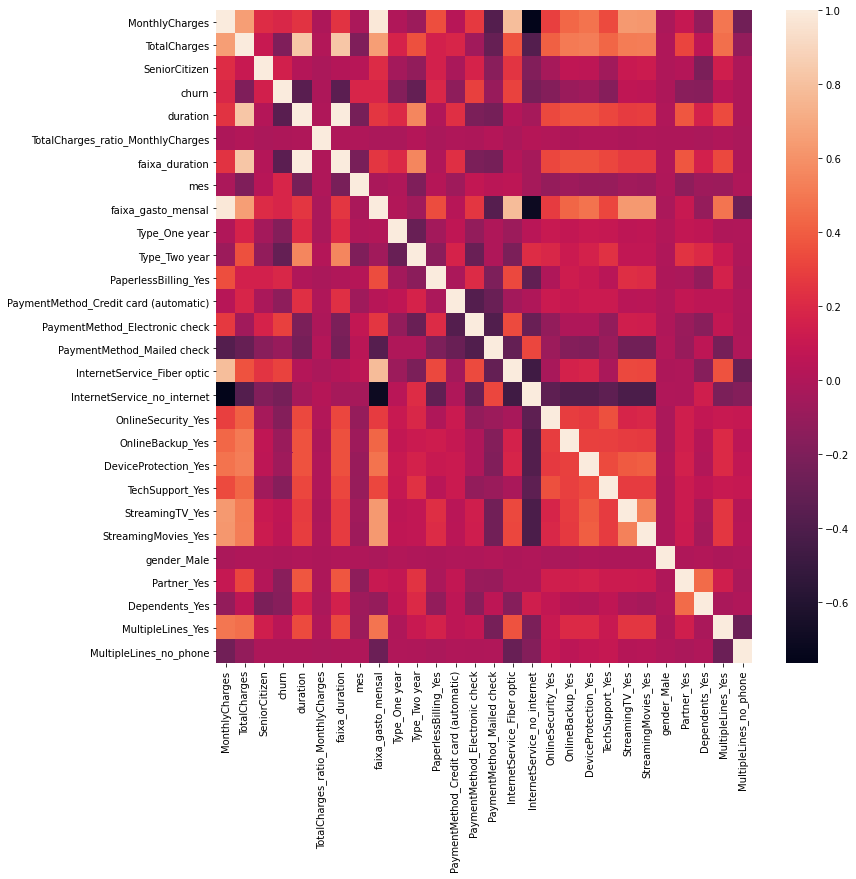

In [56]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df_corr.corr());

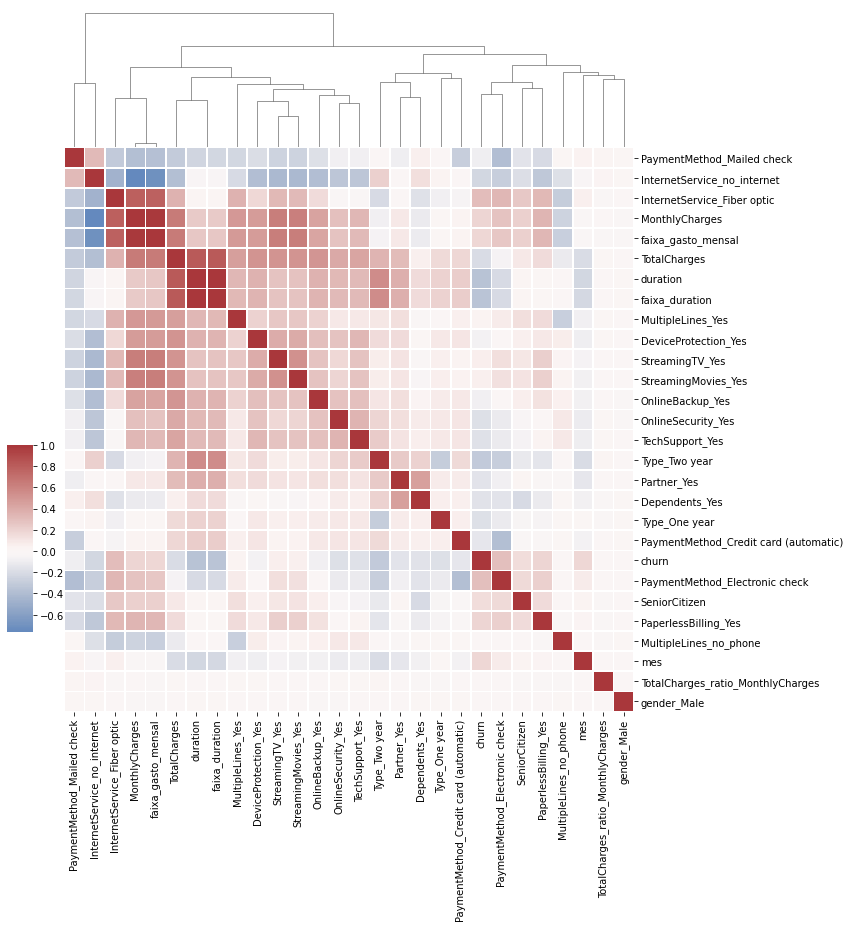

In [57]:
g = sns.clustermap(df_corr.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))
g.ax_row_dendrogram.remove()

**CONCLUSÕES DA EDA**

A tabela final continha valores ausentes, pois nem todos os clientes possuem serviço de Internet ou telefone. Meu primeiro passo foi consertar isso. Também compreendi que algumas colunas não estavam nos formatos corretos, portanto, fiz as conversões necessárias. Assim, finalizei a limpeza dos dados. 

Para enriquecer o conteúdo da pesquisa, propus algumas ideias de Feature Engineering baseadas na EDA. Criei a coluna Churn onde identifico clientes ativos e inativos. Adicionei uma coluna com a duração dos contratos em meses, subtraindo a data de término do contrato (para clientes inativos) ou a data atual (para contratos ativos) da data inicial. Por fim, gerei a coluna TotalCharges_ratio_MonthlyCharges. É uma relação entre o valor total consumido e o produto da despesa mensal e os meses de assinatura do serviço. Se esse valor for maior que 1, então o cliente está pagando mais do que a média mensal acordada. Se for menor que 1, está pagando menos. Testarei mais a frente, se essa métrica impacta no churn.

Ao explorar a distribuição de dados, notei um desequilíbrio entre clientes ativos e inativos. Também descobri que os clientes que optam por pagar mensalmente têm maior probabilidade de deixar a empresa porque a proporção relativa de clientes inativos para clientes ativos é muito maior. O mesmo ocorre com a proporção dos clientes que não recebem a cobrança em papel e escolhem o método de pagamento Eletronic Check. Os clientes que optam pelo serviço de internet de fibra ótica são mais propensos do que outros clientes a cancelar o serviço. 

Segmentando os clientes em diferentes faixas com base na duração do contrato, percebi que o churn aumenta à medida que a duração do contrato diminui. Clientes que iniciaram contratos nos últimos meses do ano também tiveram maior churn rate. A rotatividade de clientes parece ter um caráter temporal. Fazendo um teste t, descobri que a duração dos clientes que deixaram a empresa foi estatisticamente menor.

Depois de todo esse estudo da EDA, observei que as Features: Gender, MultipleLines, Streaming, DeviceProtection e OnlineBackup parecem não serem muito relevantes para o nível de churn. A coluna TotalCharges_ratio_MonthlyCharges que criei também não tem muito impacto no nível de churn. Já a duration, InternetService_Fiber optic, Payment Method, MonthlyCharges, PaperlessBilling, Type e TotalCharges são mais relevantes na rotatividade de clientes. Por fim, fiz um teste t na coluna de pagamentos mensais e foi estatisticamente maior para clientes inativos.
 




 






Meus próximos passos serão a construção do melhor modelo de machine learning possível para essa base de dados para prever o churn da operadora de comunicações Interconnect.

**CONSTRUÇÃO DO MODELO DE PREVISÃO DE CHURN**

Após alguns testei cheguei à conclusão que a variável TotalCharges_ratio_MonthlyCharges quando modificada, trouxe resultados mais robustos aos modelos explorados anteriormente. A nova feature criada, ‘ratio’, representa a razão   entre o valor mensal cobrado (MonthlyCharges), o total pago até o momento (TotalCharges) e a duração (duration) do contrato do cliente com a empresa. Essa razão pode fornecer uma medida de como o valor mensal pago pelo cliente se relaciona com o valor total já pago em relação à duração do contrato.

Por exemplo, se a razão for alta, isso pode indicar que o cliente está pagando um valor mensal relativamente alto em relação ao valor total que já pagou e à duração do contrato. Por outro lado, se a razão for baixa, isso pode indicar que o cliente está pagando um valor mensal relativamente baixo em relação ao valor total e à duração do contrato.

Essa razão pode ser útil para entender como o pagamento mensal do cliente se relaciona com o pagamento total e a duração do contrato. Pode ajudar a identificar clientes que estão pagando um valor mensal desproporcionalmente alto ou baixo em relação à duração do contrato ou ao valor total pago.


In [58]:
df.loc[df['duration']==0, 'ratio'] = 1
df.loc[df['duration']!=0, 'ratio'] =  df['MonthlyCharges'] / df['TotalCharges']/ df['duration'] 

In [59]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,Dependents,MultipleLines,churn,data,duration,TotalCharges_ratio_MonthlyCharges,faixa_duration,mes,faixa_gasto_mensal,ratio
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,no_phone,0,2020-02-01,1,1.000000,"(-0.072, 6.0]",1,"(18.15, 38.35]",1.000000
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,0,2020-02-01,34,0.975830,"(30.0, 36.0]",4,"(38.35, 58.45]",0.000886
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,1,2019-12-01,2,1.004178,"(-0.072, 6.0]",10,"(38.35, 58.45]",0.248960
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,no_phone,0,2020-02-01,45,0.967034,"(42.0, 48.0]",5,"(38.35, 58.45]",0.000511
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,1,2019-11-01,2,1.072489,"(-0.072, 6.0]",9,"(58.45, 78.55]",0.233103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,...,Yes,Yes,0,2020-02-01,24,0.978037,"(18.0, 24.0]",2,"(78.55, 98.65]",0.001775
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,...,Yes,Yes,0,2020-02-01,72,0.990916,"(66.0, 72.0]",2,"(98.65, 118.75]",0.000195
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,...,Yes,no_phone,0,2020-02-01,11,1.064036,"(6.0, 12.0]",3,"(18.15, 38.35]",0.007767
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,...,No,Yes,1,2019-11-01,4,1.030242,"(-0.072, 6.0]",7,"(58.45, 78.55]",0.060665


Definição do target (coluna 'churn') e das features selecionadas:

In [60]:
#Definição do Target
target = df['churn']

Abaixo escolhi as Features a serem usadas nos modelos de machine learning a serem testados. Devido à natureza temporal da rotatividade de clientes nesse projeto, resolvi retirar a coluna mês das features. Entendi que ela acabaria trazendo um viés para os modelos, já que só encontramos churn nos últimos 4 meses de dados (de outubro/19 até janeiro/20). Portanto, por exemplo, no caso de um duration de 1 e a variável mês 10, sempre haverá churn. Isso será um problema caso recebesse mais meses de dados para testar o modelo já treinado, por exemplo, de 02/2020 em diante e todos estes meses com casos de churn. Provavelmente, a performance o modelo seria muito menor.

In [61]:
col_drop_features= ['customerID','EndDate','churn','data','BeginDate','faixa_gasto_mensal','faixa_duration','TotalCharges_ratio_MonthlyCharges','mes']

In [62]:
#Definição das Features
features = df.drop(col_drop_features,axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  gender            7043 non-null   object 
 13  SeniorCitizen     7043 non-null   int64  
 14  Partner           7043 non-null   object 
 15  Dependents        7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


Dividi o df em conjunto de treinamento e teste. 

In [63]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

In [64]:
features_train = features_train.copy()

In [65]:
features_test = features_test.copy()


Dividi as features em três tipos:

In [66]:
#colunas numéricas que serão pré-processadas pelo StandardScaler:
numeric_col = ['MonthlyCharges', 'TotalCharges']

In [67]:
#colunas onde não haverá pré-processadas de dados:
col_or = ['ratio','SeniorCitizen','duration']

In [68]:
#colunas categóricas que serão pré-processadas pelo OneHotEncoder:
cat_col  = list(set(features.columns) - set(numeric_col) - set(col_or))

Criei a função 'eval_model' para avaliar os modelos testados. Para evitar o over overfitting farei o pré-processamento dos dados a cada iteração do GridSearchCV implementando a funcionalidade pipeline do sklearn. 

In [69]:
#Pipeline para avaliar modelos

def eval_model(model,model_name,param,cv=5):
    # Definir as transformações para colunas numéricas e categóricas
    transformacoes = [
        ('escala', StandardScaler(), numeric_col),
        ('codificacao', OneHotEncoder(), cat_col)
    ]
    pipeline = Pipeline([
        ('preprocessamento', ColumnTransformer(transformacoes)),
        ('modelo', model)
    ])
    parametros = {
        'modelo__' + key: value for key, value in param.items()
    }
    
    #Busca dos melhores Hiperparâmetros:
    grid = GridSearchCV(pipeline, 
                        parametros, 
                        cv = cv, scoring='roc_auc')
    
    grid.fit(features_train, target_train)
      
    melhores_parametros = grid.best_params_
    melhor_modelo = grid.best_estimator_
   
    probabilities_test = grid.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    #Cálculo do AUC_ROC:
    auc_roc = roc_auc_score(target_test,probabilities_one_test)
    test_predictions = grid.predict(features_test)
    #Cálculo da acurácia:
    accuracy_teste = accuracy_score(target_test, test_predictions)
    #Cálculo do F1:
    f1 = f1_score(target_test, test_predictions)
    #Matriz de Confusão:
    confusion = confusion_matrix(target_test,test_predictions)
        
    print(model_name)    
    print('')
    print("Os melhores parâmetros são %s com um score de %0.2f"% 
          (grid.best_params_,grid.best_score_))

    # Construindo Gráficos:
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)  

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.show()
            
    # Obter os resultados de validação cruzada
    cv_results = grid.cv_results_
    # Extrair as médias e desvios padrão da métrica
    mean_scores = cv_results['mean_test_score']
    std_scores = cv_results['std_test_score']
    # Encontrar o índice do melhor resultado
    best_index = np.argmax(mean_scores)
    # Obter a média e desvio padrão do melhor resultado
    best_mean_score = mean_scores[best_index]
    best_std_score = std_scores[best_index]
    # Imprimir a média e desvio padrão do melhor resultado
    print(f"Score Médio do melhor Modelo {best_mean_score:.2%} e desvio padrão {best_std_score:.2%}")
        
    print("Matriz de Confusão:")
    print(confusion)
    print("")
    tabela = pd.DataFrame( 
    {'Resultados' : [auc_roc,accuracy_teste,f1,(best_mean_score*100),(best_std_score*100)]},
    index = ['AUC-ROC','Acurácia','F1','Score Med','D.P'])
    print(tabela)
    print("")

    return tabela, melhor_modelo        

Floresta Aleatória

Comecei testando o modelo Floresta Aleatória que foi minha escolha de modelos baseados em árvores.  Primeiro testei um modelo com tunning de hiper parâmetros e depois outro sem. 

In [70]:
rf = RandomForestClassifier(random_state = 12345)
param_rf = {'n_estimators':[50,100,150], 
        'max_depth':[5,10,20],
        'class_weight' : [None,'balanced'],
        'max_features':['sqrt','log2']     
}
model_name_rf = 'Random Forest'

Random Forest

Os melhores parâmetros são {'modelo__class_weight': None, 'modelo__max_depth': 5, 'modelo__max_features': 'sqrt', 'modelo__n_estimators': 100} com um score de 0.84


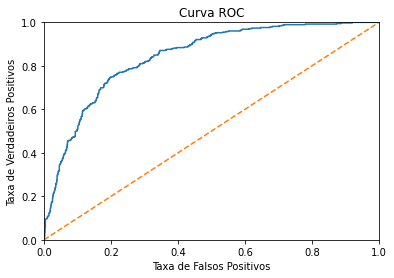

Score Médio do melhor Modelo 84.13% e desvio padrão 1.89%
Matriz de Confusão:
[[962  68]
 [223 156]]

           Resultados
AUC-ROC      0.842474
Acurácia     0.793471
F1           0.517413
Score Med   84.127247
D.P          1.889865

CPU times: user 1min 38s, sys: 221 ms, total: 1min 38s
Wall time: 1min 39s


In [71]:
%%time
flor_rand = eval_model(model = rf,model_name=model_name_rf,param=param_rf)

In [72]:
rf = RandomForestClassifier(random_state = 12345)
param_rf = { 
}
model_name_rf = 'Random Forest'

Random Forest

Os melhores parâmetros são {} com um score de 0.81


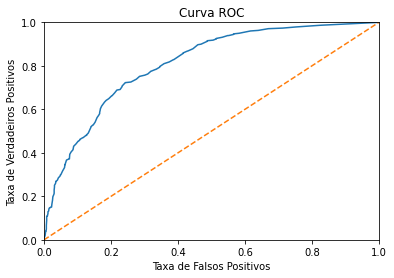

Score Médio do melhor Modelo 81.30% e desvio padrão 1.83%
Matriz de Confusão:
[[920 110]
 [204 175]]

           Resultados
AUC-ROC      0.809812
Acurácia     0.777147
F1           0.527108
Score Med   81.300316
D.P          1.833610

CPU times: user 4.24 s, sys: 4.12 ms, total: 4.24 s
Wall time: 4.27 s


In [73]:
%%time
flor_rand_p = eval_model(model = rf,model_name=model_name_rf,param=param_rf)

O modelo com tunning de hiper-parâmetros demonstrou um resultado superior ao sem esses ajustes. 

Regressão Logística

In [74]:
rl = LogisticRegression(random_state=12345)
param_rl = {                
}
model_name_rl = 'Modelo de Regressão Logistica'

Modelo de Regressão Logistica

Os melhores parâmetros são {} com um score de 0.84


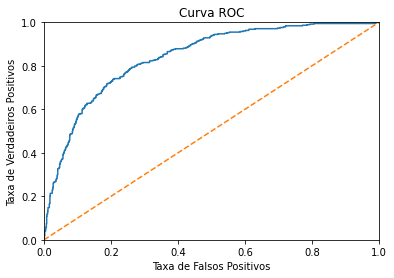

Score Médio do melhor Modelo 83.68% e desvio padrão 2.04%
Matriz de Confusão:
[[929 101]
 [168 211]]

           Resultados
AUC-ROC      0.840483
Acurácia     0.809084
F1           0.610709
Score Med   83.675209
D.P          2.037836

CPU times: user 1.06 s, sys: 2.06 s, total: 3.12 s
Wall time: 3.14 s


In [75]:
%%time
reg_log = eval_model(model = rl,model_name=model_name_rl,param=param_rl)

O segundo modelo testado foi o de Regressão Logística, muito utilizado em tarefas de classificação. Seus resultados foram semelhantes ao melhor modelo de Floresta Aleatória com ajustes de hiper-parâmetros. 

**GRADIENT BOOSTING**

Nos próximos códigos testei 3 modelos baseados em algoritmos de Gradiente Boosting. Testei possibilidades com  e sem ajustes nos hiperparâmetros.

LGBM

In [76]:
lgbm = LGBMClassifier(random_state=12345)
param_lgbm = {
}
model_name_lgbm = 'Modelo de LGBM'

Modelo de LGBM

Os melhores parâmetros são {} com um score de 0.83


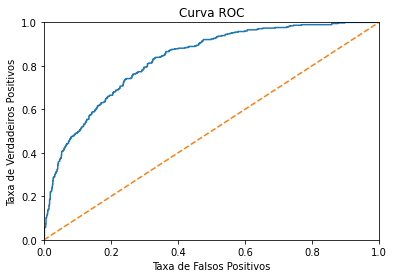

Score Médio do melhor Modelo 83.37% e desvio padrão 1.70%
Matriz de Confusão:
[[908 122]
 [178 201]]

           Resultados
AUC-ROC      0.829452
Acurácia     0.787083
F1           0.572650
Score Med   83.366317
D.P          1.703333

CPU times: user 3.32 s, sys: 28.3 ms, total: 3.35 s
Wall time: 3.39 s


In [77]:
%%time

lgbm_class = eval_model(model = lgbm,model_name=model_name_lgbm,param=param_lgbm)

In [78]:
lgbm2 = LGBMClassifier(random_state=12345)
param_lgbm = {'n_estimators':[100,200,300],
              'learning_rate': [0.04, 0.06, 0.08]
}
model_name_lgbm = 'Modelo de LGBM com Hiperparametros'

Modelo de LGBM com Hiperparametros

Os melhores parâmetros são {'modelo__learning_rate': 0.04, 'modelo__n_estimators': 100} com um score de 0.84


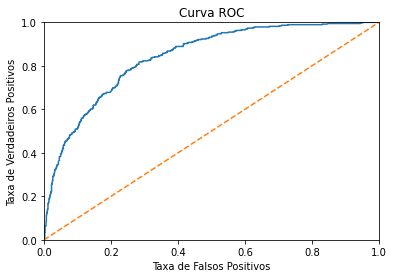

Score Médio do melhor Modelo 84.14% e desvio padrão 1.81%
Matriz de Confusão:
[[932  98]
 [186 193]]

           Resultados
AUC-ROC      0.841340
Acurácia     0.798439
F1           0.576119
Score Med   84.139692
D.P          1.805926

CPU times: user 45.4 s, sys: 457 ms, total: 45.9 s
Wall time: 46.4 s


In [79]:
%%time
lgbm_clas_hiper = eval_model(model = lgbm2,model_name=model_name_lgbm,param=param_lgbm)

CatBoost

In [80]:
cat = CatBoostClassifier(random_state=12345, verbose=False)
param_cat = {'depth':[5,7],
              'learning_rate': [0.06, 0.08],
             'iterations': [700,1000],
             'auto_class_weights': ['None', 'Balanced', 'SqrtBalanced']
}
model_name_cat = 'Modelo de CatBoost'

Modelo de CatBoost

Os melhores parâmetros são {'modelo__auto_class_weights': 'None', 'modelo__depth': 5, 'modelo__iterations': 700, 'modelo__learning_rate': 0.06} com um score de 0.83


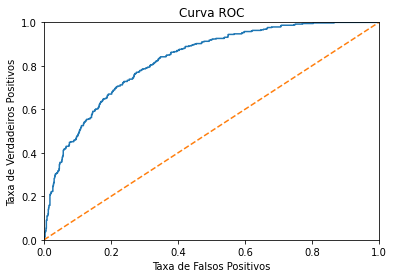

Score Médio do melhor Modelo 83.35% e desvio padrão 1.96%
Matriz de Confusão:
[[918 112]
 [187 192]]

           Resultados
AUC-ROC      0.826859
Acurácia     0.787793
F1           0.562225
Score Med   83.352642
D.P          1.960514

CPU times: user 7min 56s, sys: 1.78 s, total: 7min 57s
Wall time: 8min 11s


In [81]:
%%time
cat_clas = eval_model(model = cat,model_name=model_name_cat,param=param_cat)

XGBOOST

In [82]:
xgb = XGBClassifier(random_state=12345,eval_metric='auc')
param_xgb = {
}
model_name_xgb = 'Modelo XGB'

Modelo XGB

Os melhores parâmetros são {} com um score de 0.82


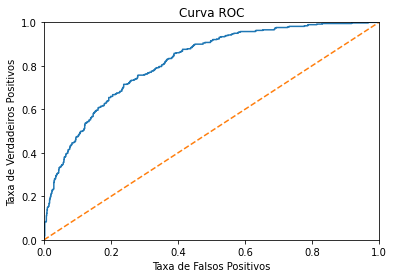

Score Médio do melhor Modelo 82.06% e desvio padrão 1.80%
Matriz de Confusão:
[[905 125]
 [185 194]]

           Resultados
AUC-ROC      0.817437
Acurácia     0.779986
F1           0.555874
Score Med   82.056150
D.P          1.798640

CPU times: user 15.6 s, sys: 62.1 ms, total: 15.6 s
Wall time: 15.8 s


In [83]:
%%time
xgboost = eval_model(model = xgb,model_name=model_name_xgb,param=param_xgb)

XGBOOST HIPERPARAMETROS

In [84]:
xgb_hip = XGBClassifier(random_state=12345,eval_metric='auc')
param_xgb_hip = {'max_depth':[10,20],
                 'learning_rate':[0.1,0.3],
                 'n_estimators':[100,200,300]
}
model_name_xgb_hip = 'Modelo XGB Hiper'

Modelo XGB Hiper

Os melhores parâmetros são {'modelo__learning_rate': 0.1, 'modelo__max_depth': 10, 'modelo__n_estimators': 100} com um score de 0.82


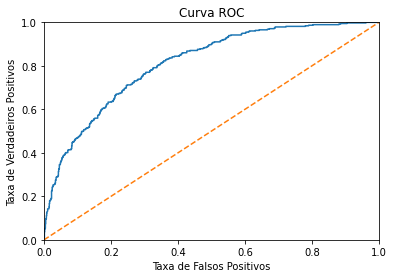

Score Médio do melhor Modelo 82.11% e desvio padrão 1.91%
Matriz de Confusão:
[[898 132]
 [184 195]]

           Resultados
AUC-ROC      0.811871
Acurácia     0.775727
F1           0.552408
Score Med   82.109683
D.P          1.914233

CPU times: user 10min 5s, sys: 2.49 s, total: 10min 7s
Wall time: 10min 15s


In [85]:
%%time
xgboost_hip = eval_model(model = xgb_hip,model_name=model_name_xgb_hip,param=param_xgb_hip)


Esses modelos apresentaram resultados análogos aos anteriores. Dos modelos testados o LGBM com hiperparametros atingiu o melhor AUC-ROC, 0.84.


KNN

In [86]:
model_knn = KNeighborsClassifier(n_neighbors=30)
param_knn = {'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p':[1,2]
}
model_name_knn = 'Modelo KNN'

Modelo KNN

Os melhores parâmetros são {'modelo__algorithm': 'kd_tree', 'modelo__p': 2, 'modelo__weights': 'uniform'} com um score de 0.83


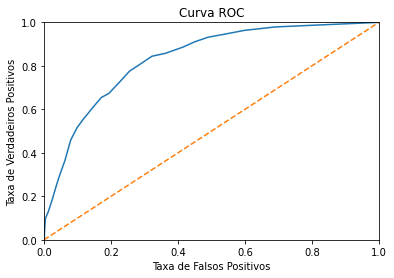

Score Médio do melhor Modelo 82.69% e desvio padrão 2.09%
Matriz de Confusão:
[[911 119]
 [170 209]]

           Resultados
AUC-ROC      0.833101
Acurácia     0.794890
F1           0.591231
Score Med   82.691877
D.P          2.086825

CPU times: user 23.9 s, sys: 3.3 s, total: 27.2 s
Wall time: 27.2 s


In [87]:
%%time
knn = eval_model(model = model_knn,model_name=model_name_knn,param=param_knn)

Rede Neural

In [88]:
features_train_neural = features_train
features_test_neural = features_test


features_train_neural = pd.get_dummies(features_train, columns = cat_col, drop_first=True)
features_test_neural = pd.get_dummies(features_test, columns = cat_col, drop_first=True)

scaler = StandardScaler()

features_train_neural[numeric_col] = scaler.fit_transform(features_train[numeric_col])
features_test_neural[numeric_col] = scaler.transform(features_test[numeric_col])

In [89]:
%%time
# Função para criar o modelo de redes neurais
def create_model():
    model_neu = Sequential()
    model_neu.add(Dense(32, activation='relu', input_shape=(features_train_neural.shape[1],)))
    model_neu.add(Dense(16, activation='relu'))
    model_neu.add(Dense(1, activation='sigmoid'))

    model_neu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))
    return model_neu

# Criar o estimador do KerasClassifier
estimator = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Realizar a validação cruzada
cv_scores = cross_val_score(estimator, features_train_neural, target_train, cv=5, scoring='roc_auc')
# Imprimir os resultados
score_mean_neu = cv_scores.mean()
score_dp_neu = cv_scores.std()

print("AUC-ROC médio da validação cruzada:", score_mean_neu)
print("Desvio padrão da validação cruzada:", score_dp_neu)

2023-07-20 00:15:59.664239: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


AUC-ROC médio da validação cruzada: 0.8480771643583976
Desvio padrão da validação cruzada: 0.018702110221615956
CPU times: user 17.6 s, sys: 2.69 s, total: 20.3 s
Wall time: 20.4 s


In [90]:
model_neu = Sequential()
model_neu.add(Dense(32, activation='relu', input_shape=(features_train_neural.shape[1],)))
model_neu.add(Dense(16, activation='relu'))
model_neu.add(Dense(1, activation='sigmoid'))

model_neu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

model_neu.fit(features_train_neural, target_train, epochs=10, batch_size=32, verbose=0)

In [91]:
# Fazer previsões no conjunto de teste
predictions = model_neu.predict(features_test_neural)

# Calcular a métrica AUC-ROC
auc_roc_neu = roc_auc_score(target_test, predictions)

In [92]:
#Escolhendo threshold: 
limite = 0.6
predictions_limiar = np.where(predictions>limite,1,0)
# Calcular a métricas Acurácia e F1:
accuracy_teste_neu = accuracy_score(target_test, predictions_limiar)
f1_neu = f1_score(target_test, predictions_limiar)

tabela_neu = pd.DataFrame( 
    {'Resultados' : [auc_roc_neu,accuracy_teste_neu,f1_neu,(score_mean_neu*100),(score_dp_neu*100)]},
    index = ['AUC-ROC','Acurácia','F1','Score Med','D.P'])
print(tabela_neu)

           Resultados
AUC-ROC      0.835215
Acurácia     0.797729
F1           0.586357
Score Med   84.807716
D.P          1.870211


Acima foram testados também os modelos KNN (K-vizinhos mais próximos) e de Redes Neurais. Eles trouxeram resultados bem similares aos melhores modelos já treinados.

Modelos Ensemble:

Por último, teste um modelo Ensemble, onde construí um método de agregação dos modelos LGBM , Regressão Logistica e KNN.

In [93]:
#Pipeline para criar e avaliar modelos Ensemble

def eval_model_ensemble(model1,model_name1,model2,model_name2,model3,model_name3,param,pesos, cv=5):
    
    # Definir as colunas numéricas e categóricas
    colunas_numericas = numeric_col
    colunas_categoricas = cat_col

    # Definir as transformações para colunas numéricas e categóricas
    transformacoes = [
        ('escala', StandardScaler(), colunas_numericas),
        ('codificacao', OneHotEncoder(), colunas_categoricas)
    ]

    # Inicializar o modelo de ensemble com votação ponderada
    ensemble_model = VotingClassifier(estimators=[('modelo_1', model1), ('modelo_2', model2), ('modelo_3', model3)],
                                      voting='soft', weights=pesos)

    # Criar o pipeline com as etapas de pré-processamento e modelagem
    pipeline = Pipeline([
        ('preprocessamento', ColumnTransformer(transformacoes)),
        ('modelo', ensemble_model)
    ])

    # Definir os hiperparâmetros a serem ajustados
    parametros = {
        'modelo__' + key: value for key, value in param.items()
    }

    # Criar o objeto GridSearchCV
    grid = GridSearchCV(pipeline, parametros, scoring='roc_auc', cv=cv)

    # Executar a pesquisa em grade
    grid.fit(features_train, target_train)

    model = grid.best_estimator_

    probabilities_test = grid.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    auc_roc = roc_auc_score(target_test,probabilities_one_test)

    test_predictions = grid.predict(features_test)
    accuracy_teste = accuracy_score(target_test, test_predictions)
    f1 = f1_score(target_test, test_predictions)
    confusion = confusion_matrix(target_test,test_predictions)

    
    print('Modelo Ensemble com:',model_name1,',',model_name2,'e',model_name3)    
    print('')
    print("Os melhores parâmetros são %s com um score de %0.2f"% 
          (grid.best_params_,grid.best_score_))

    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)  # < escreva o código aqui >

    plt.figure()

    # < construir o gráfico >
    plt.plot(fpr, tpr)
    # Curva ROC para modelo aleatório (parece uma linha reta)
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < use as funções plt.xlim() e plt.ylim() para
    #   defina o limite para os eixos de 0 a 1 >
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # < use as funções plt.xlabel() e plt.ylabel() para
    #   nomear os eixos "Taxa de positivos falsos e "Taxa de positivos verdadeiros" >
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    # < adicione o cabeçalho "curva ROC" com a função plt.title() >
    plt.title('Curva ROC')
    plt.show()

    # Obter os resultados de validação cruzada
    cv_results = grid.cv_results_
    # Extrair as médias e desvios padrão da métrica
    mean_scores = cv_results['mean_test_score']
    std_scores = cv_results['std_test_score']
    # Encontrar o índice do melhor resultado
    best_index = np.argmax(mean_scores)
    # Obter a média e desvio padrão do melhor resultado
    best_mean_score = mean_scores[best_index]
    best_std_score = std_scores[best_index]
    # Imprimir a média e desvio padrão do melhor resultado
    print(f"Score Médio do melhor Modelo {best_mean_score:.2%} e desvio padrão {best_std_score:.2%}")
    
    
    print("Matriz de Confusão:")
    print(confusion)
    print("")
    tabela = pd.DataFrame( 
    {'Resultados' : [auc_roc,accuracy_teste,f1,(best_mean_score*100),(best_std_score*100)]},
    index = ['AUC-ROC','Acurácia','F1','Score Med','D.P'])
    print(tabela)
    print("")
       
    
    return tabela, model 

ENSEMBLE 1

In [94]:
model11=LGBMClassifier(random_state=12345)
model_name11='LGBM'
model22=LogisticRegression(random_state=12345)
model_name22= 'Regressão Logistica'
model33= KNeighborsClassifier(n_neighbors=3)
model_name33='KNN'
param={
    'modelo_1__n_estimators': [100,200,300],
    'modelo_2__C': [0.1, 1, 10],
    'modelo_3__p': [1,2]
    
   
}
peso=[0.4, 0.3, 0.3]

Modelo Ensemble com: LGBM , Regressão Logistica e KNN

Os melhores parâmetros são {'modelo__modelo_1__n_estimators': 100, 'modelo__modelo_2__C': 1, 'modelo__modelo_3__p': 2} com um score de 0.83


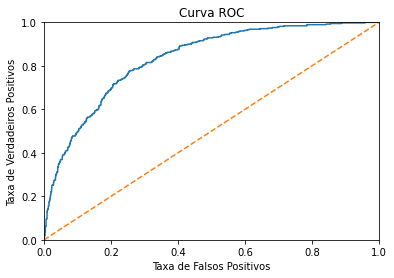

Score Médio do melhor Modelo 83.10% e desvio padrão 2.04%
Matriz de Confusão:
[[917 113]
 [183 196]]

           Resultados
AUC-ROC      0.832560
Acurácia     0.789922
F1           0.569767
Score Med   83.098508
D.P          2.035394

CPU times: user 1min 53s, sys: 29 s, total: 2min 22s
Wall time: 2min 24s


In [95]:
%%time

ensemble1 = eval_model_ensemble(model11,model_name11,model22,model_name22,model33,model_name33,param,peso, cv=5)

Por último, teste um modelo Ensemble levemente inferior aos melhores modelos, com métrica AUC-RO de 0,83.

**Resumo:**

Compilei os resultados de todos modelos testados abaixo:  

In [96]:
todos_modelos = [flor_rand_p[0],flor_rand[0],reg_log[0],lgbm_class[0],lgbm_clas_hiper[0],cat_clas[0],knn[0],xgboost[0],xgboost_hip[0], ensemble1[0],tabela_neu]
nomes_modelos = ['Floresta Aleatória','Floresta Aleatória Hiper' , 'Regressão Logística', 'LGBM', 'LGBM HIPER' , 'CatBoost', 'KNN' ,'XGB','XGB HIPER', 'Ensemble','Redes Neurais']

In [97]:
resumo = pd.concat(todos_modelos,axis=1)
resumo.columns = nomes_modelos
resumo.T

,AUC-ROC,Acurácia,F1,Score Med,D.P
Floresta Aleatória,0.809812,0.777147,0.527108,81.300316,1.833610
Floresta Aleatória Hiper,0.842474,0.793471,0.517413,84.127247,1.889865
Regressão Logística,0.840483,0.809084,0.610709,83.675209,2.037836
LGBM,0.829452,0.787083,0.572650,83.366317,1.703333
LGBM HIPER,0.841340,0.798439,0.576119,84.139692,1.805926
CatBoost,0.826859,0.787793,0.562225,83.352642,1.960514
KNN,0.833101,0.794890,0.591231,82.691877,2.086825
XGB,0.817437,0.779986,0.555874,82.056150,1.798640
XGB HIPER,0.811871,0.775727,0.552408,82.109683,1.914233
Ensemble,0.832560,0.789922,0.569767,83.098508,2.035394


Os modelos Floresta Aleatória HIPER, Regressão Logística, Redes Neurais e LGBM HIPER, obtiveram os melhores resultados para AUC-ROC, a métrica primária do trabalho. Os únicos que superaram a barreira de 0,84.  Como desses 4, o modelo e LGBM HIPER apresentou o menor desvio padrão do resultado do cross-validation e a segunda melhor acurácia (métrica secundária do projeto) o escolhi como o melhor modelo para prever churn da operadora Interconnect.

Após a escolha do melhor modelo, treinei-o com todo conjunto de treino e avaliei as métricas de performance.

In [98]:
#Pré-Processamento One-hot-encoding:
features_train = pd.get_dummies(features_train, columns = cat_col, drop_first=True)
features_test = pd.get_dummies(features_test, columns = cat_col, drop_first=True)

In [99]:
#Pré-Processamento StandardScaler:
scaler = StandardScaler()

features_train[numeric_col] = scaler.fit_transform(features_train[numeric_col])
features_test[numeric_col] = scaler.transform(features_test[numeric_col])

In [100]:
#Definindo melhor modelo:
best_model = LGBMClassifier(random_state=12345,learning_rate=0.04,n_estimators=100)

In [101]:
#Treinando melhor modelo:
best_model.fit(features_train, target_train)

LGBMClassifier(learning_rate=0.04, random_state=12345)

In [102]:
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
#Cálculo do AUC_ROC:
auc_roc = roc_auc_score(target_test,probabilities_one_test)
test_predictions = best_model.predict(features_test)
#Cálculo da acurácia:
accuracy_teste = accuracy_score(target_test, test_predictions)
#Cálculo do F1:
f1 = f1_score(target_test, test_predictions)

tabela = pd.DataFrame( 
{'Resultados' : [auc_roc,accuracy_teste,f1]},
index = ['AUC-ROC','Acurácia','F1'])
print(tabela)

          Resultados
AUC-ROC     0.839005
Acurácia    0.801278
F1          0.583333


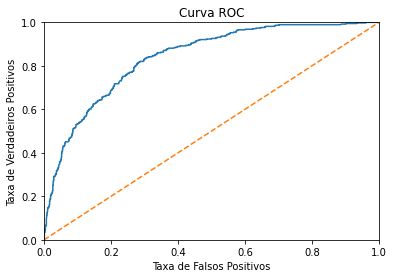

In [103]:
# Construindo Gráfico Curva ROC do melhor modelo:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)  

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

Importância de cada Feature 


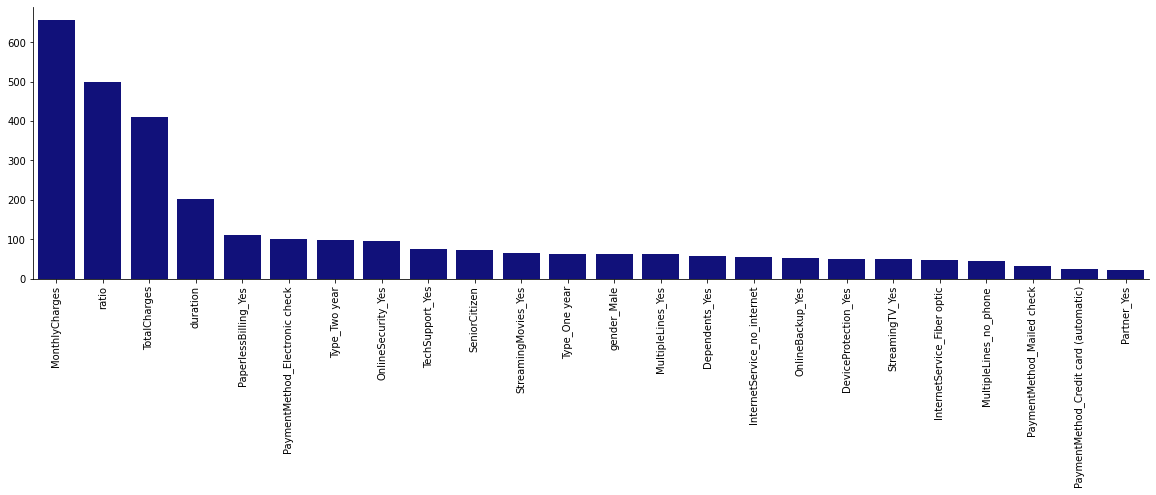

In [104]:
# Gráfico da Importância de cada Feature do melhor modelo:
try:
    print("Importância de cada Feature ")
    indexes = np.argsort(best_model.feature_importances_)[::-1]
    coef = best_model.feature_importances_[indexes]
    fig, ax = plt.subplots(figsize = (20,5))
    sns.barplot(np.array(features_train.columns)[indexes], coef, ax = ax, color = 'darkblue')
    plt.xticks(rotation = 90)
    sns.despine()
except:
    print("Modelo sem atributo '.feature_importances_'")


O modelo escolhido manteve AUC-ROC perto de 0.84, um resultado satisfatório. Quando gerado o gráfico da importância de cada feature, fica claro que as variáveis que mais impactam no modelo são Monthly_charge, ratio, Total charges e duration.


**Incerteza do Modelo**

Averiguei as incertezas nas predições do modelo escolhido. Quanto mais próximas de 0.5 são as probabilidades, mais incerto é o modelo.

In [105]:
incerteza = len(probabilities_test[(probabilities_test>0.45) & (probabilities_test <0.55)])/len(probabilities_test)
print(f"Proporção das observações com grau de incerteza: {incerteza:.2%}")

Proporção das observações com grau de incerteza: 13.77%


Vemos que cerda de 13% das predições estão próximas a probabilidade de 0.5. 

**Erro por Sub-Grupos**

Para avaliar os erros do modelo, examinei se existe algum subgrupo que destoa em termos de erro. Para isso, calculei a diferença em pontos percentuais da concentração de cada grupo na amostra inteira e nos erros. 

In [106]:
test_predictions = best_model.predict(features_test)
df_test = features_test
df_test['target'] = target_test
df_test['pred'] = test_predictions
df_test['erro']=np.where(df_test['pred']!=df_test['target'],1,0)

In [107]:
num_erro = ['MonthlyCharges', 'TotalCharges','duration','ratio','target','pred','erro']
cat_col_erro  = list(set(df_test.columns) - set(num_erro) )

In [108]:
for c in cat_col_erro:
    print(round((df_test.groupby(c)['erro'].sum() / (df_test['erro'].sum()) - df_test.groupby(c)['erro'].count() / len(df_test['erro']))*100,2))
    print("")

PaymentMethod_Electronic check
0   -13.66
1    13.66
Name: erro, dtype: float64

Type_Two year
0    21.06
1   -21.06
Name: erro, dtype: float64

OnlineSecurity_Yes
0    8.53
1   -8.53
Name: erro, dtype: float64

DeviceProtection_Yes
0    3.21
1   -3.21
Name: erro, dtype: float64

Type_One year
0    9.8
1   -9.8
Name: erro, dtype: float64

PaymentMethod_Credit card (automatic)
0    3.8
1   -3.8
Name: erro, dtype: float64

SeniorCitizen
0   -5.89
1    5.89
Name: erro, dtype: float64

MultipleLines_Yes
0    0.45
1   -0.45
Name: erro, dtype: float64

TechSupport_Yes
0    6.39
1   -6.39
Name: erro, dtype: float64

Partner_Yes
0    6.97
1   -6.97
Name: erro, dtype: float64

Dependents_Yes
0    5.8
1   -5.8
Name: erro, dtype: float64

PaymentMethod_Mailed check
0    4.5
1   -4.5
Name: erro, dtype: float64

StreamingMovies_Yes
0   -4.88
1    4.88
Name: erro, dtype: float64

PaperlessBilling_Yes
0   -9.01
1    9.01
Name: erro, dtype: float64

gender_Male
0   -2.47
1    2.47
Name: erro, dtype: f

As variáveis: InternetService, Type, InternetService_Fiber optic e PaymentMethod apresentaram a maior diferença em relação ao erro. 

**Conclusões Gerais:**

O objetivo central deste projeto foi desenvolver um modelo para a operadora de comunicações Interconnect a fim de prever a rotatividade de seus clientes.

A base de dados fornecida consistia em quatro tabelas contendo informações gerais do contrato, dados do plano de Internet, telefone e informações pessoais de cada cliente da empresa. Após uma análise inicial, todas as tabelas foram unidas em uma única tabela, que serviu como base para as análises e para a construção do modelo preditivo de machine learning.

Durante a análise exploratória dos dados (EDA), foram identificados valores ausentes devido à falta de serviços de Internet ou telefone para alguns clientes. Para tratar esses valores ausentes, foram escolhidas substituições apropriadas. Além disso, algumas colunas apresentavam formatos incorretos, sendo necessário realizar conversões adequadas. Na etapa de limpeza dos dados, os valores ausentes em "TotalCharges" foram substituídos pelo valor correspondente em "MonthlyCharges", uma vez que esses valores nulos ocorreram apenas para clientes no primeiro mês de contrato, que ainda não haviam sido cobrados até a extração dos dados pela empresa.

Com o objetivo de enriquecer a pesquisa, foram propostas algumas ideias de Feature Engineering com base na EDA. Foi criada a coluna "Churn" para identificar clientes ativos e inativos. Também foi adicionada uma coluna representando a duração dos contratos em meses, calculada subtraindo a data de término do contrato (para clientes inativos) ou a data atual (para contratos ativos) da data de início. Por fim, foi gerada a coluna "ratio", que representa a razão entre o valor mensal cobrado, o valor total pago até o momento e a duração do contrato. Essa razão pode fornecer uma medida de como o valor mensal pago pelo cliente se relaciona com o valor total já pago em relação à duração do contrato, sendo útil para identificar clientes que estão pagando um valor mensal desproporcionalmente alto ou baixo em relação à duração do contrato ou ao valor total pago.

Durante a análise da distribuição dos dados, foi observado um desequilíbrio entre clientes ativos e inativos. Verificou-se também que os clientes que optam pelo pagamento mensal têm maior probabilidade de deixar a empresa, devido à proporção relativa de clientes inativos para clientes ativos ser significativamente maior nesse grupo. O mesmo ocorre com a proporção de clientes que não recebem cobrança em papel e escolhem o método de pagamento "Eletronic Check". Além disso, os clientes que optam pelo serviço de Internet de fibra ótica têm maior propensão a cancelar o serviço em comparação com os demais clientes.

Ao segmentar os clientes com base na duração do contrato, observou-se que a taxa de rotatividade aumenta à medida que a duração do contrato diminui. Também foi constatado que clientes que iniciaram contratos nos últimos meses do ano apresentaram maior taxa de churn. A rotatividade de clientes parece ter uma característica temporal. Por meio de um teste t, verificou-se que a duração dos contratos dos clientes que deixaram a empresa foi estatisticamente menor. Além disso, a coluna "MonthlyCharges" apresentou valores estatisticamente maiores para os clientes que sofrem churn.

Após toda essa análise da EDA, identificou-se que as features "Gender", "MultipleLines", "Streaming", "DeviceProtection" e "OnlineBackup" não parecem ser muito relevantes para o nível de churn. Por outro lado, as features “ratio”, "duration", "InternetService_Fiber optic", "Payment Method", "MonthlyCharges", "PaperlessBilling", "Type" e "TotalCharges" mostraram-se mais relevantes na rotatividade de clientes. 
Prosseguindo para a criação de um modelo de machine learning capaz de prever o churn, foram selecionadas as colunas a serem utilizadas como features. Devido à natureza temporal da rotatividade de clientes neste projeto, a coluna "mês" foi excluída das features. Entendeu-se que essa coluna poderia introduzir um viés nos modelos, uma vez que o churn ocorreu apenas nos últimos 4 meses de dados (de outubro/19 a janeiro/20). Portanto, por exemplo, no caso de uma duração de contrato igual a 1 e o mês correspondente sendo outubro, sempre haveria churn. Isso poderia ser problemático caso fossem recebidos mais meses de dados para testar o modelo já treinado, por exemplo, a partir de fevereiro de 2020, em que todos esses meses apresentassem casos de churn. Isso provavelmente afetaria negativamente o desempenho do modelo. Outras colunas também foram removidas por não fornecerem informações relevantes.

Após dividir o conjunto de dados em treinamento e teste, foi criada a função "eval_model" para avaliar os modelos testados. Na busca pela escolha do melhor modelo para o problema proposto, foram testadas abordagens como Floresta Aleatória (com e sem ajustes de hiperparâmetros), Regressão Logística, Gradient Boosting (LGBM, Catboost, XGBoost, todos com e sem ajustes de hiperparâmetros), KNN, Ensemble e redes neurais. Para avaliar a eficácia desses modelos, utilizaram-se a métrica primária AUC-ROC e a acurácia como métrica adicional.

In [109]:
resumo.T

,AUC-ROC,Acurácia,F1,Score Med,D.P
Floresta Aleatória,0.809812,0.777147,0.527108,81.300316,1.833610
Floresta Aleatória Hiper,0.842474,0.793471,0.517413,84.127247,1.889865
Regressão Logística,0.840483,0.809084,0.610709,83.675209,2.037836
LGBM,0.829452,0.787083,0.572650,83.366317,1.703333
LGBM HIPER,0.841340,0.798439,0.576119,84.139692,1.805926
CatBoost,0.826859,0.787793,0.562225,83.352642,1.960514
KNN,0.833101,0.794890,0.591231,82.691877,2.086825
XGB,0.817437,0.779986,0.555874,82.056150,1.798640
XGB HIPER,0.811871,0.775727,0.552408,82.109683,1.914233
Ensemble,0.832560,0.789922,0.569767,83.098508,2.035394


Entre os modelos avaliados, os melhores resultados em termos de AUC-ROC, a métrica primária do projeto, foram alcançados pelos modelos Floresta Aleatória HIPER, Regressão Logística, Redes Neurais e LGBM HIPER. Apenas esses quatro modelos conseguiram superar a marca de 0,84. Dentre eles, o modelo LGBM HIPER se destacou por apresentar o menor desvio padrão nos resultados da validação cruzada e a segunda melhor acurácia, que é a métrica secundária do projeto. Portanto, com base nesses critérios, o modelo LGBM HIPER foi escolhido como o melhor modelo para prever a rotatividade de clientes (churn) na operadora Interconnect.

Após a escolha do melhor modelo, treinei-o com todo conjunto de treino e avaliei as métricas de performance.



In [110]:
tabela

,Resultados
AUC-ROC,0.839005
Acurácia,0.801278
F1,0.583333


O gráfico da importância de cada feature do modelo LGBM HIPER mostrou que Monthly_charge, ratio, Total charges e duratio contribuiram mais nas predições de churn. 

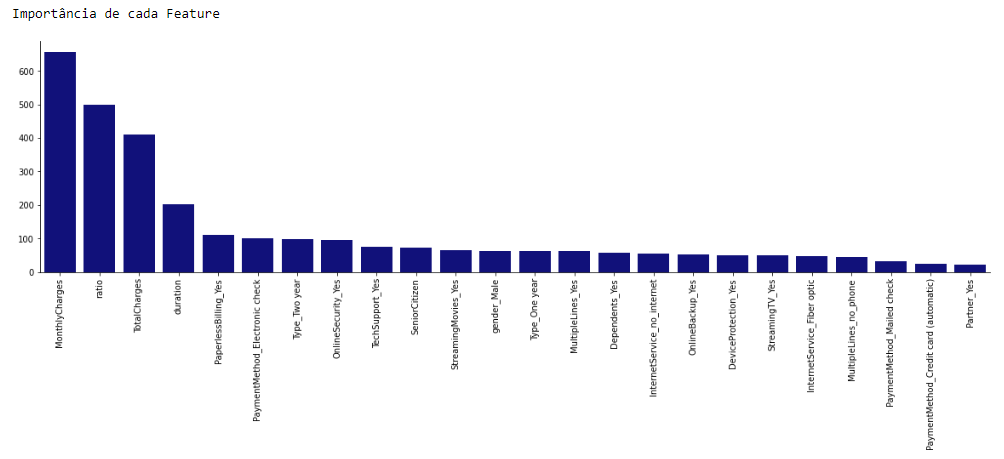

O modelo escolhido, LGBM HIPER, demonstrou ser o mais eficaz para essa tarefa, alcançando uma alta taxa de AUC-ROC e acurácia. Com esse modelo em mãos, uma operadora poderá tomar medidas proativas para reter clientes em risco de churn, implementando estratégias personalizadas de retenção e capacidade de satisfação geral de seus usuários. Dessa forma, espera-se que o modelo contribua para o aprimoramento dos serviços oferecidos pela Interconnect e resulte em uma maior fidelização dos clientes, impactando positivamente os resultados do negócio.